<!-- @format -->

# 1 创建项目环境步骤

- 1、安装 anaconda，并配置环境变量
- 2、创建虚拟环境 conda create -n myenv python=3.9
- 3、激活虚拟环境 conda activate myenv
- 4、安装相关包 pip install -r requirements.txt

```

```


# 2.线性回归-加利福尼房价

In [11]:
from sklearn.datasets import fetch_california_housing
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import seaborn as sns

In [12]:
house = fetch_california_housing()

In [13]:
print(house.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<center><img src="boston.png"  width=800></center>

In [14]:
x = house.data
y = house.target

In [15]:
df = pd.DataFrame(x, columns=house.feature_names)
df['Target'] = pd.DataFrame(y, columns=['Target'])

其中数据集有10个属性，分别为经度、纬度、housing_median_age、房间总数、卧室总数、人口数、家庭数、收入中位数、房价中位数、ocean_proximity。

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


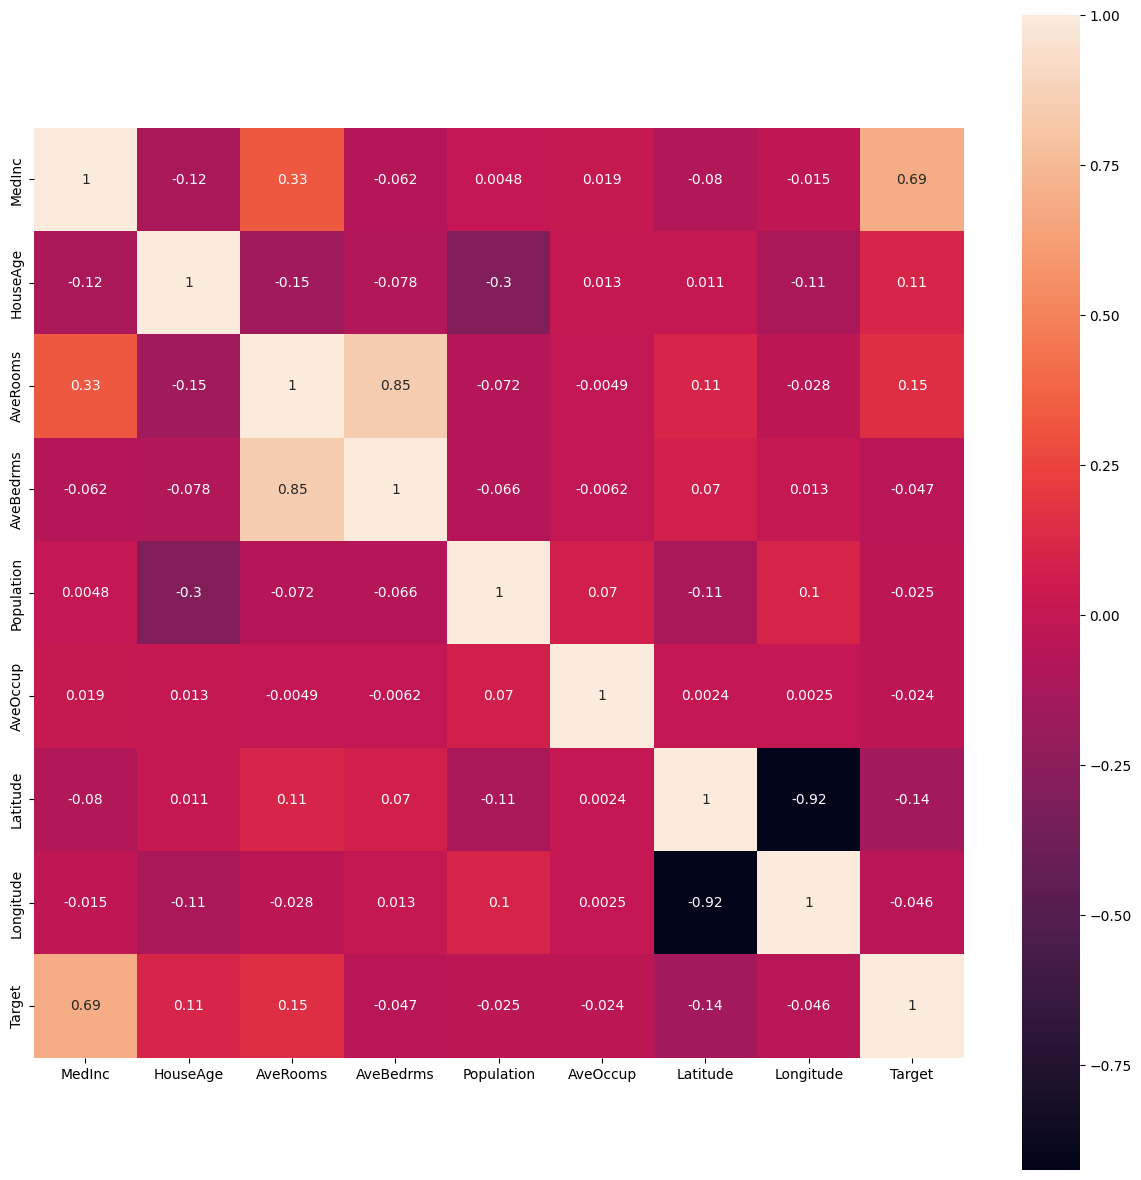

In [17]:
plt.figure(figsize=(15,15))  
# 画热力图，数值为两个变量之间的相关系数
p=sns.heatmap(df.corr(), annot=True, square=True) 

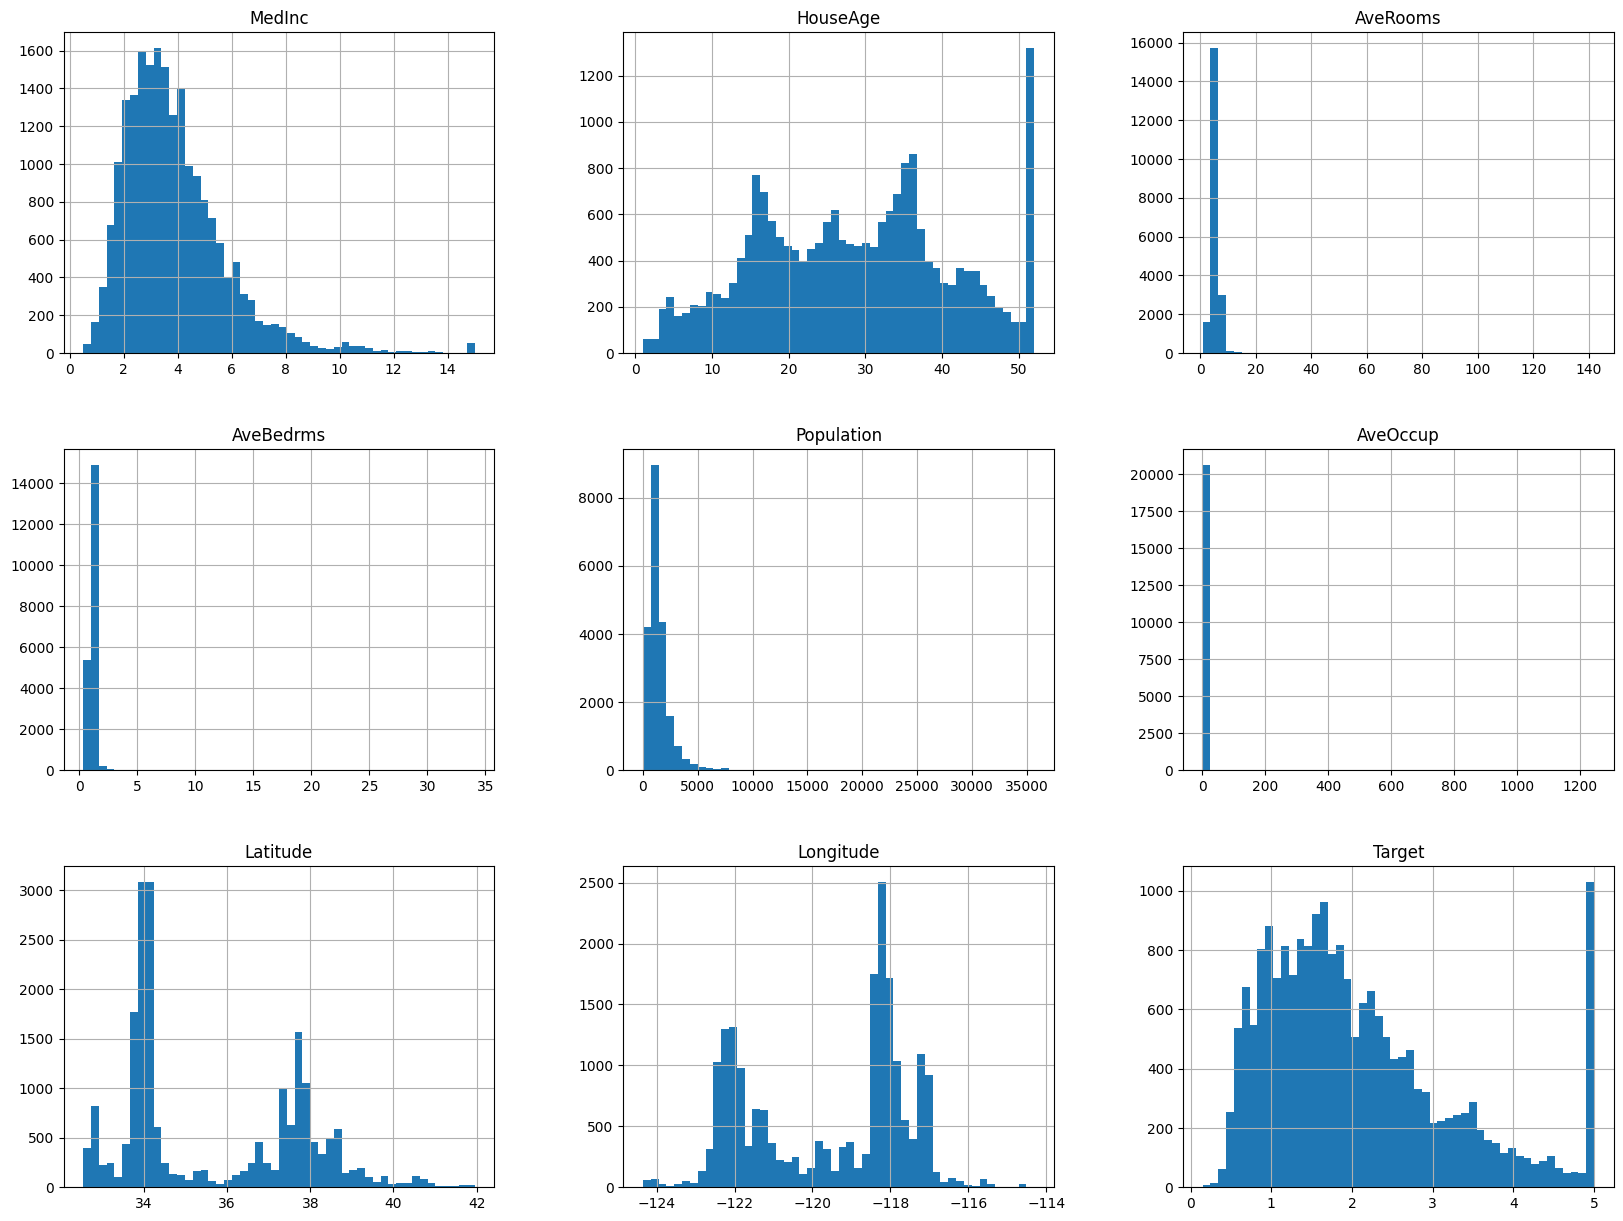

In [26]:
# 绘制所有数值属性的直方图
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [18]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)

In [19]:
print(x[:5])

[[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654
   1.05254828 -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223
   1.04318455 -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253
   1.03850269 -1.33282653]
 [ 0.93296751  1.85618152  0.15696608 -0.04983292 -0.76602806 -0.0503293
   1.03850269 -1.33781784]
 [-0.012881    1.85618152  0.3447108  -0.03290586 -0.75984669 -0.08561576
   1.03850269 -1.33781784]]


In [20]:
from sklearn.model_selection import train_test_split
# 切分数据集
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [24]:
# 创建模型
model = LassoCV()
model.fit(x_train, y_train)

# lasso系数
print(model.alpha_)
# 相关系数
print(model.coef_)

0.004311587081071459
[ 0.81713813  0.12193648 -0.21782361  0.23516779 -0.00135143 -0.0378168
 -0.83160072 -0.8040465 ]


In [25]:
model.score(x_test, y_test)

0.5968152420793449

- 可以看到单纯的线性回归无法解决这个问题

# 2.1 线性回归-葡萄酒质量和时间关系

In [27]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

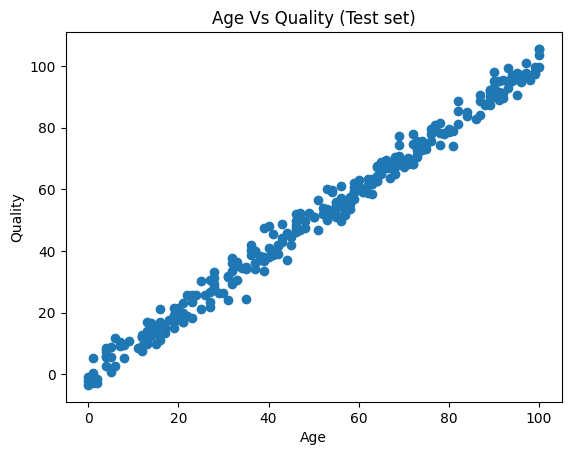

In [29]:
# 载入数据
data = np.genfromtxt('data/linear.csv', delimiter=',')
# 画图
plt.scatter(data[1:,0],data[1:,1])
plt.title('Age Vs Quality (Test set)')
plt.xlabel('Age')
plt.ylabel('Quality')
plt.show()

In [30]:
# 数据拆分
x_train, x_test, y_train, y_test = train_test_split(data[1:, 0], data[1:, 1], test_size = 0.3)

In [31]:
# 1D->2D，给数据增加一个维度，主要是训练模型的时候，函数要求传入2维的数据
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

In [32]:
# 训练模型
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

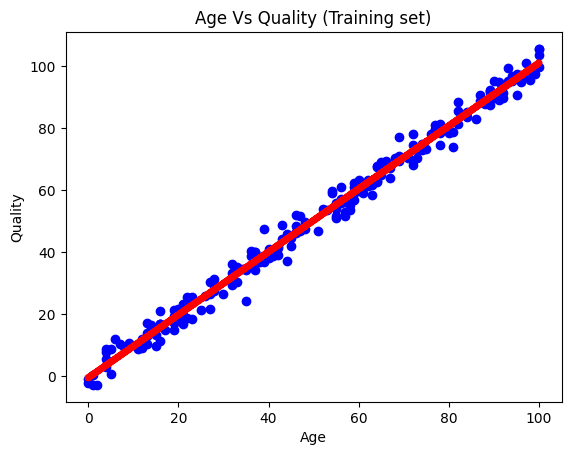

In [33]:
# 训练集的散点图
plt.scatter(x_train, y_train, color = 'b')
# 模型对训练集的预测结果
plt.plot(x_train,model.predict(x_train), color ='r' , linewidth=5)
# 画表头和xy坐标描述
plt.title('Age Vs Quality (Training set)')
plt.xlabel('Age')
plt.ylabel('Quality')
plt.show()

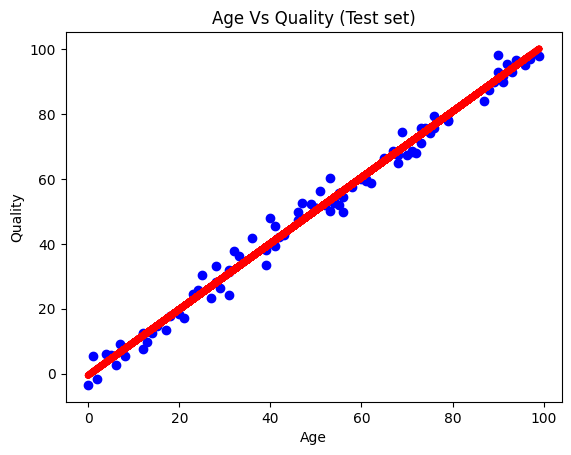

In [34]:
# 测试集的散点图
plt.scatter(x_test, y_test, color = 'b')
# 模型对测试集的预测结果
plt.plot(x_test,model.predict(x_test), color ='r', linewidth=5)
# 画表头和xy坐标描述
plt.title('Age Vs Quality (Test set)')
plt.xlabel('Age')
plt.ylabel('Quality')
plt.show()

# 3 逻辑回归

In [37]:
import numpy as np

In [39]:
train_data = np.genfromtxt('data/Churn-Modelling.csv',delimiter=',',dtype=str)
test_data = np.genfromtxt('data/Churn-Modelling-Test-Data.csv',delimiter=',',dtype=str)

In [40]:
x_train = train_data[1:,:-1]
y_train = train_data[1:,-1].astype(int)
x_test = test_data[1:,:-1]
y_test = test_data[1:,-1].astype(int)

In [41]:
x_train = np.delete(x_train,[0,1,2],axis=1)
x_test = np.delete(x_test,[0,1,2],axis=1)

In [42]:
x_train[:5]

array([['619', 'France', 'Female', '42', '2', '0', '1', '1', '1',
        '101348.88'],
       ['608', 'Spain', 'Female', '41', '1', '83807.86', '1', '0', '1',
        '112542.58'],
       ['502', 'France', 'Female', '42', '8', '159660.8', '3', '1', '0',
        '113931.57'],
       ['699', 'France', 'Female', '39', '1', '0', '2', '0', '0',
        '93826.63'],
       ['850', 'Spain', 'Female', '43', '2', '125510.82', '1', '1', '1',
        '79084.1']], dtype='<U23')

In [43]:
y_train[:5]

array([1, 0, 1, 0, 0])

In [ ]:
# x_train[x_train=='Female'] = 0
# x_train[x_train=='Male'] = 1

In [44]:
from sklearn.preprocessing import LabelEncoder
labelencoder1 = LabelEncoder()
x_train[:,1] = labelencoder1.fit_transform(x_train[:,1])
x_test[:,1] = labelencoder1.transform(x_test[:,1])
labelencoder2 = LabelEncoder()
x_train[:,2] = labelencoder2.fit_transform(x_train[:,2])
x_test[:,2] = labelencoder2.transform(x_test[:,2])

In [45]:
x_train[:5]

array([['619', '0', '0', '42', '2', '0', '1', '1', '1', '101348.88'],
       ['608', '2', '0', '41', '1', '83807.86', '1', '0', '1',
        '112542.58'],
       ['502', '0', '0', '42', '8', '159660.8', '3', '1', '0',
        '113931.57'],
       ['699', '0', '0', '39', '1', '0', '2', '0', '0', '93826.63'],
       ['850', '2', '0', '43', '2', '125510.82', '1', '1', '1',
        '79084.1']], dtype='<U23')

In [46]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
x_train[:5]

array([[-0.3262214 , -0.9018862 , -1.0959876 ,  0.29351744, -1.0417597 ,
        -1.2258477 , -0.9115835 ,  0.64609164,  0.97024256,  0.02188654],
       [-0.44003597,  1.5150673 , -1.0959876 ,  0.19816384, -1.3875377 ,
         0.11735001, -0.9115835 , -1.547768  ,  0.97024256,  0.21653372],
       [-1.5367941 , -0.9018862 , -1.0959876 ,  0.29351744,  1.0329077 ,
         1.3330532 ,  2.5270567 ,  0.64609164, -1.0306702 ,  0.2406869 ],
       [ 0.50152063, -0.9018862 , -1.0959876 ,  0.00745665, -1.3875377 ,
        -1.2258477 ,  0.8077366 , -1.547768  , -1.0306702 , -0.10891786],
       [ 2.0638838 ,  1.5150673 , -1.0959876 ,  0.388871  , -1.0417597 ,
         0.78572786, -0.9115835 ,  0.64609164,  0.97024256, -0.36527577]],
      dtype=float32)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

LR = LinearRegression()
LR.fit(x_train,y_train)

predictions = LR.predict(x_test)
# 如果你做的是回归任务，应该用回归指标，比如 mean_squared_error、r2_score 等
print("MSE:", mean_squared_error(y_test, predictions))
print("R2:", r2_score(y_test, predictions))

MSE: 0.16954830288887024
R2: 0.11877185106277466


# 3.1 逻辑回归 糖尿病预测模型

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pregnancies：怀孕次数  
Glucose：葡萄糖测试值  
BloodPressure：血压  
SkinThickness：皮肤厚度  
Insulin：胰岛素  
BMI：身体质量指数  
DiabetesPedigreeFunction：糖尿病遗传函数  
Age：年龄  
Outcome：糖尿病标签

In [57]:
# 载入数据
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
# 数据信息
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
# 数据描述
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
# 数据形状
diabetes_data.shape

(768, 9)

Outcome
0    500
1    268
Name: count, dtype: int64


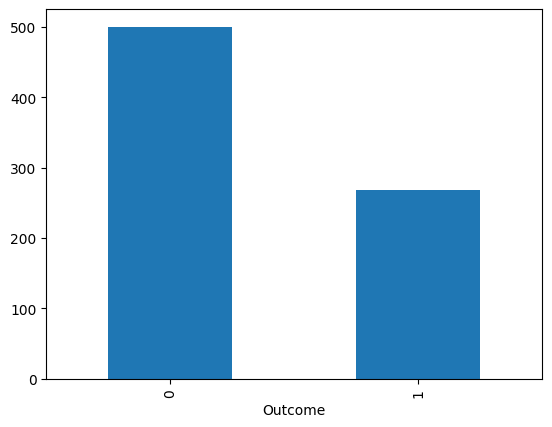

In [61]:
# 查看标签分布
print(diabetes_data.Outcome.value_counts())
# 使用柱状图的方式画出标签个数统计
p=diabetes_data.Outcome.value_counts().plot(kind="bar")
plt.show()

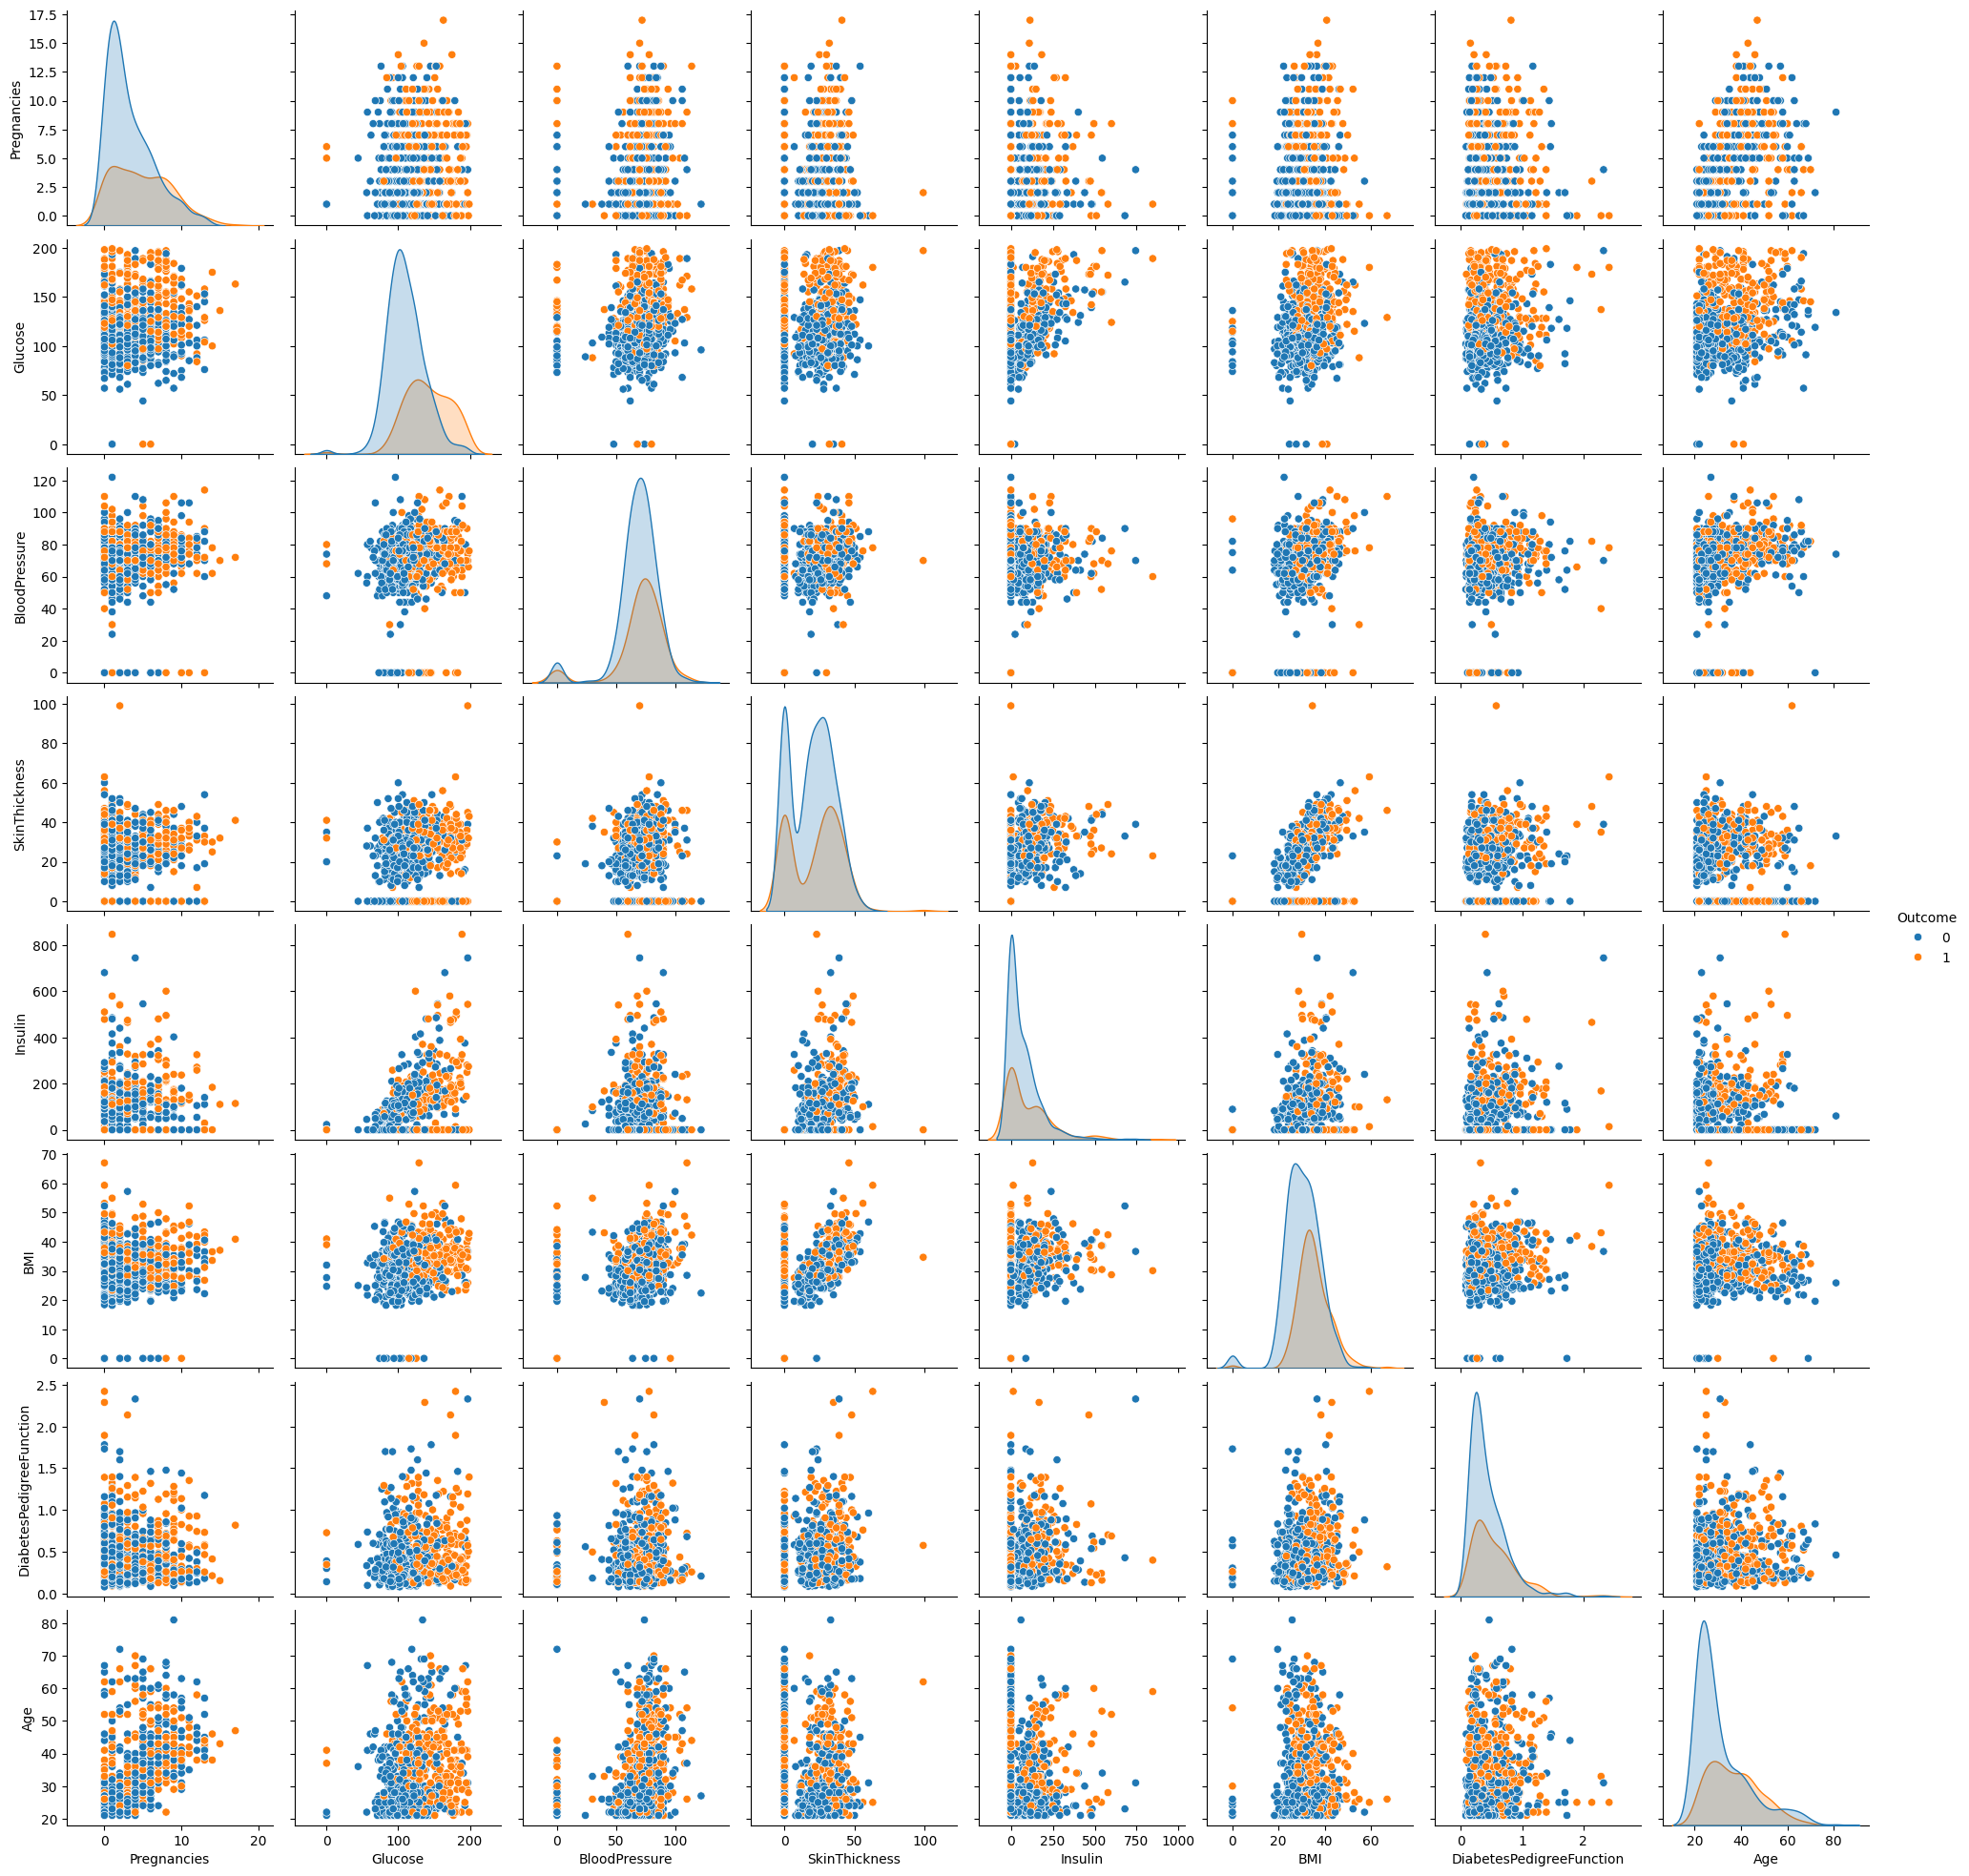

In [62]:
# 可视化数据分布
p=sns.pairplot(diabetes_data, hue = 'Outcome')
plt.show()

这里画的图主要是两种类型，直方图和散点图。单一特征对比的时候用的是直方图，不同特征对比的时候用的是散点图，显示两个特征的之间的关系。观察数据分布我们可以发现一些异常值，比如Glucose葡萄糖，BloodPressure血压，SkinThickness皮肤厚度，Insulin胰岛素，BMI身体质量指数这些特征应该是不可能出现0值的。

In [63]:
# 把葡萄糖，血压，皮肤厚度，胰岛素，身体质量指数中的0替换为nan
colume = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[colume] = diabetes_data[colume].replace(0,np.nan)

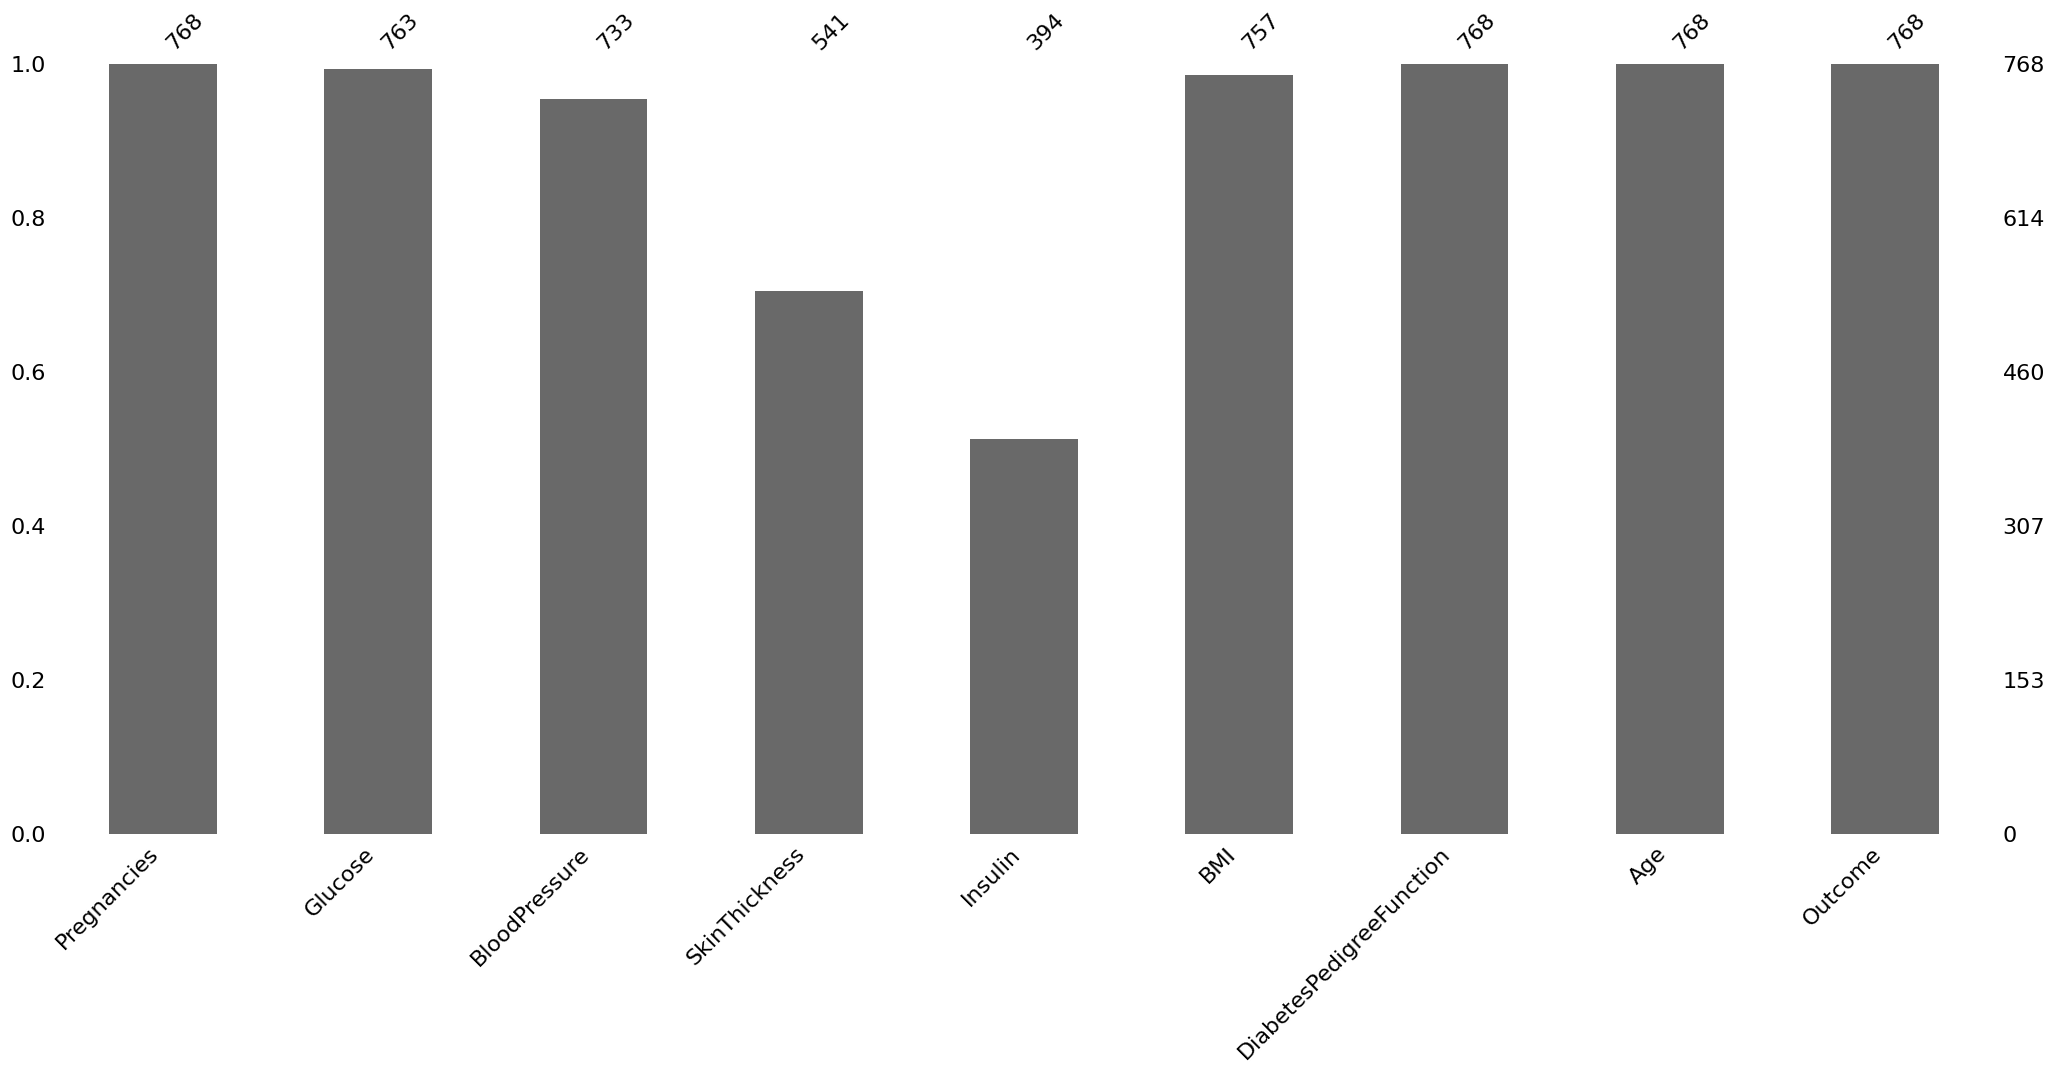

In [64]:
# pip install missingno
import missingno as msno
p=msno.bar(diabetes_data)
plt.show()

In [65]:
# 设定阀值
thresh_count = diabetes_data.shape[0]*0.8
# 若某一列数据缺失的数量超过20%就会被删除
diabetes_data = diabetes_data.dropna(thresh=thresh_count, axis=1) 

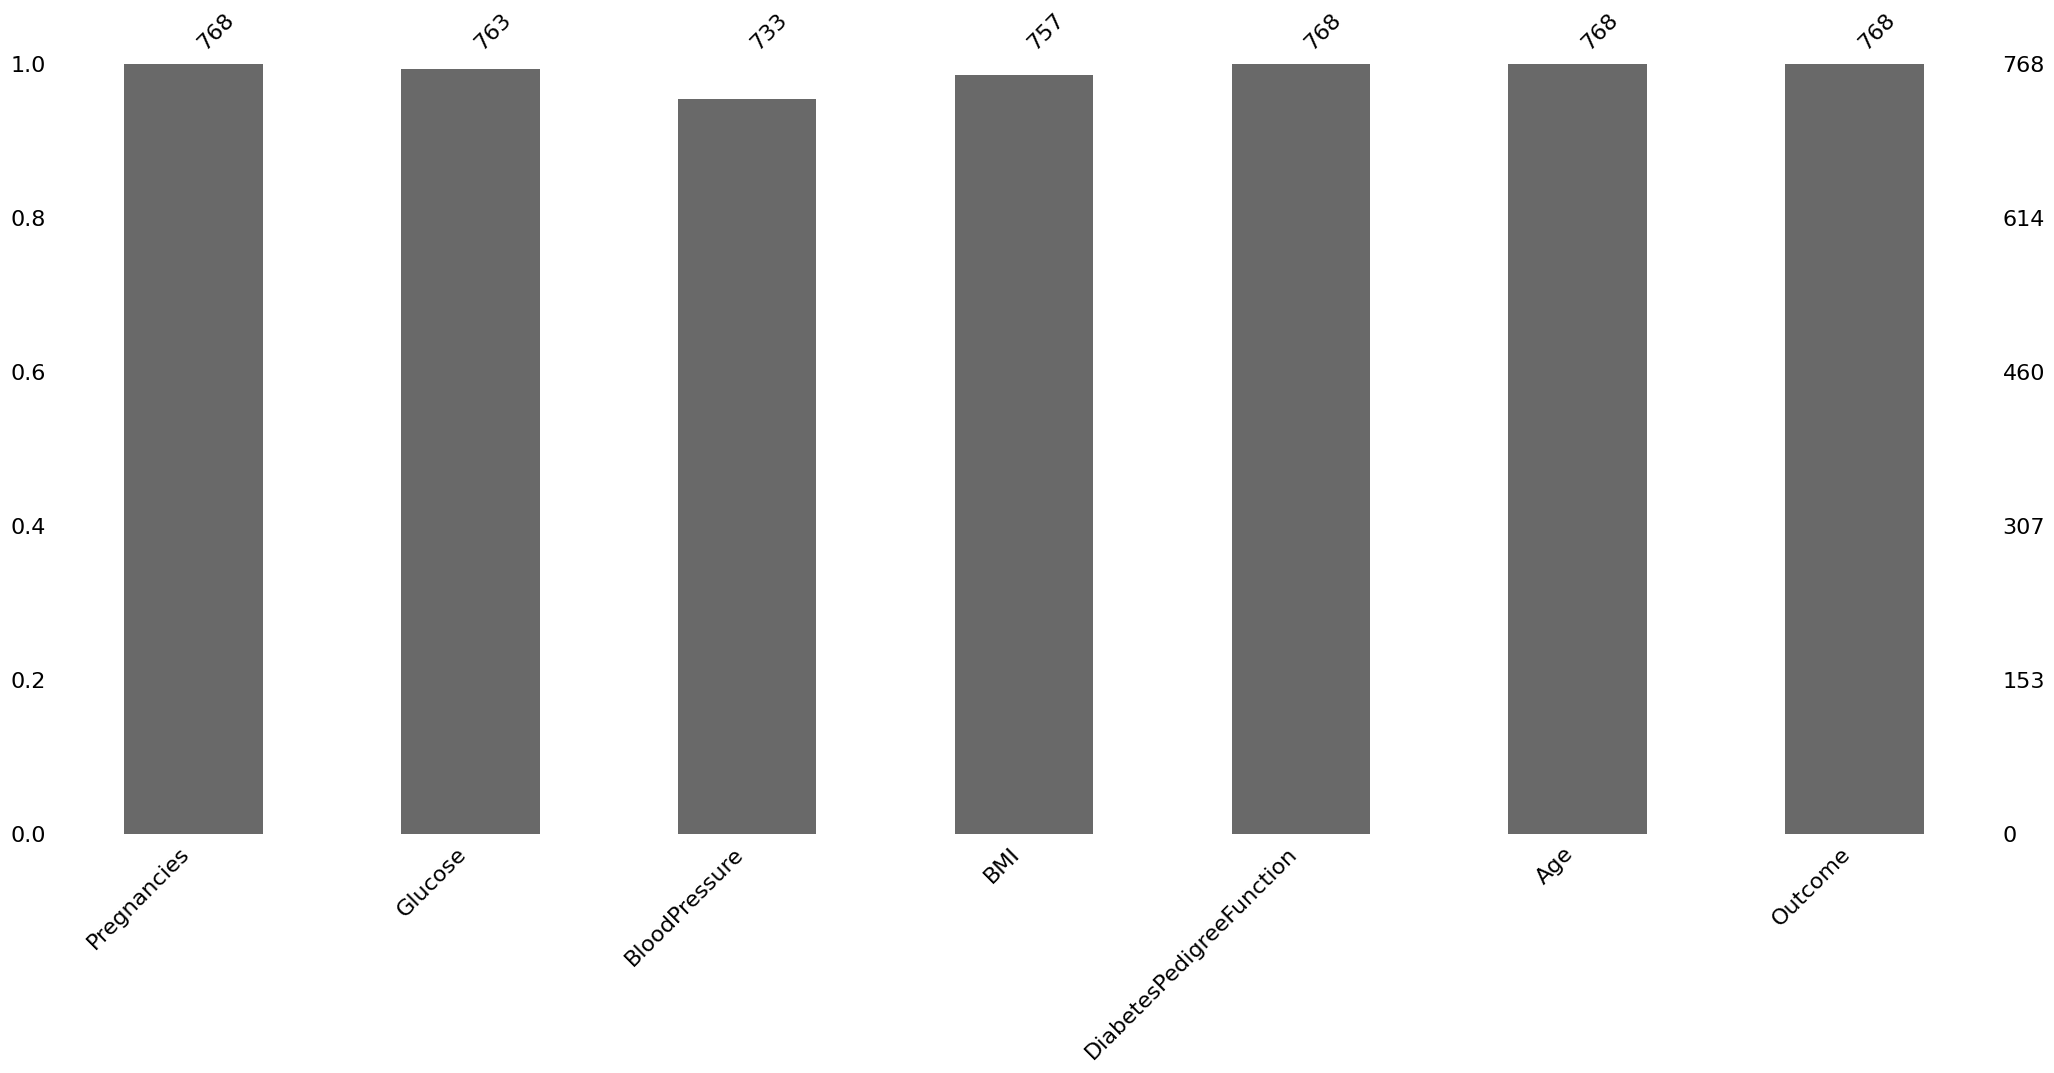

In [66]:
p=msno.bar(diabetes_data)
plt.show()

In [70]:
# 导入插补库
from sklearn.impute import SimpleImputer 
# 对数值型变量的缺失值，我们采用均值插补的方法来填充缺失值
imr = SimpleImputer(strategy='mean') 
colume =  ['Glucose', 'BloodPressure', 'BMI']
# 进行插补
diabetes_data[colume] = imr.fit_transform(diabetes_data[colume]) 

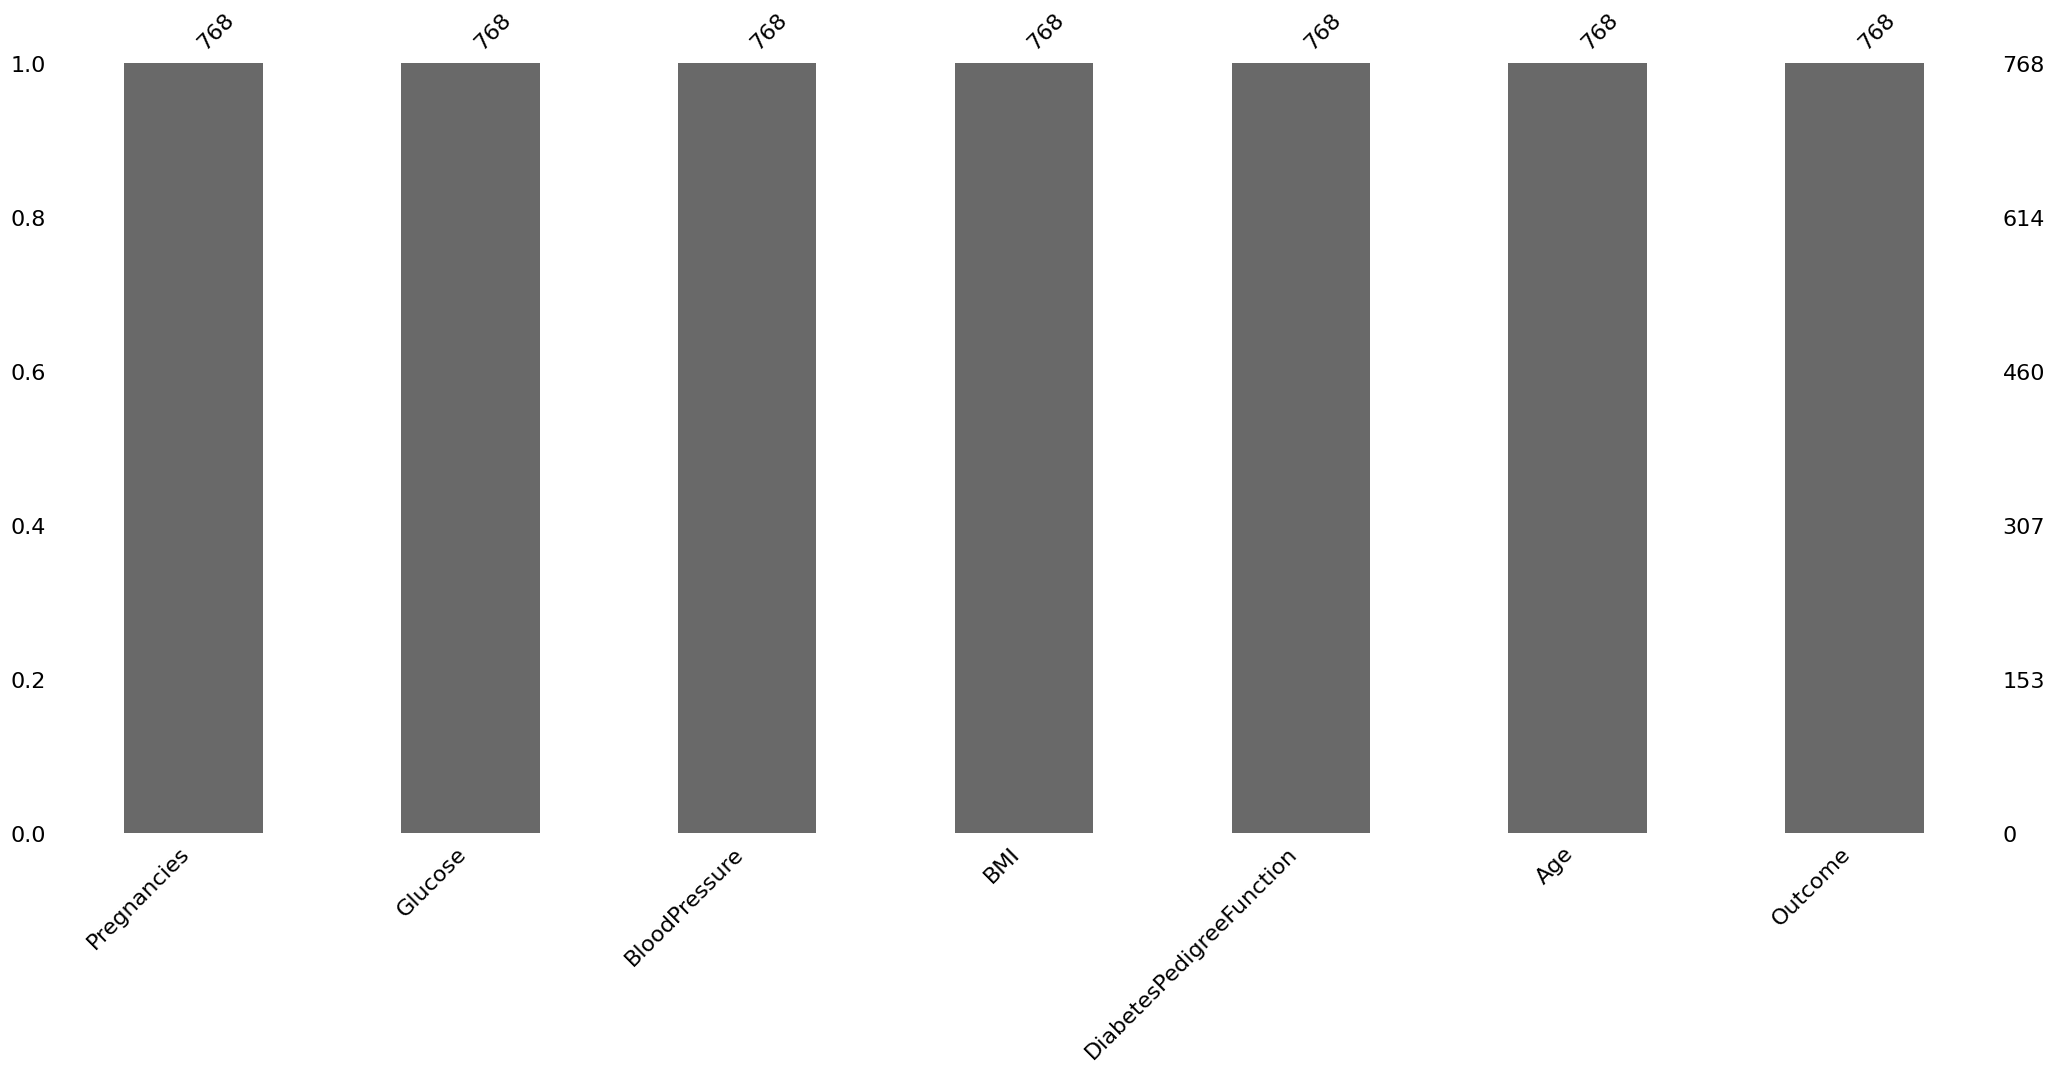

In [71]:
p=msno.bar(diabetes_data)
plt.show()

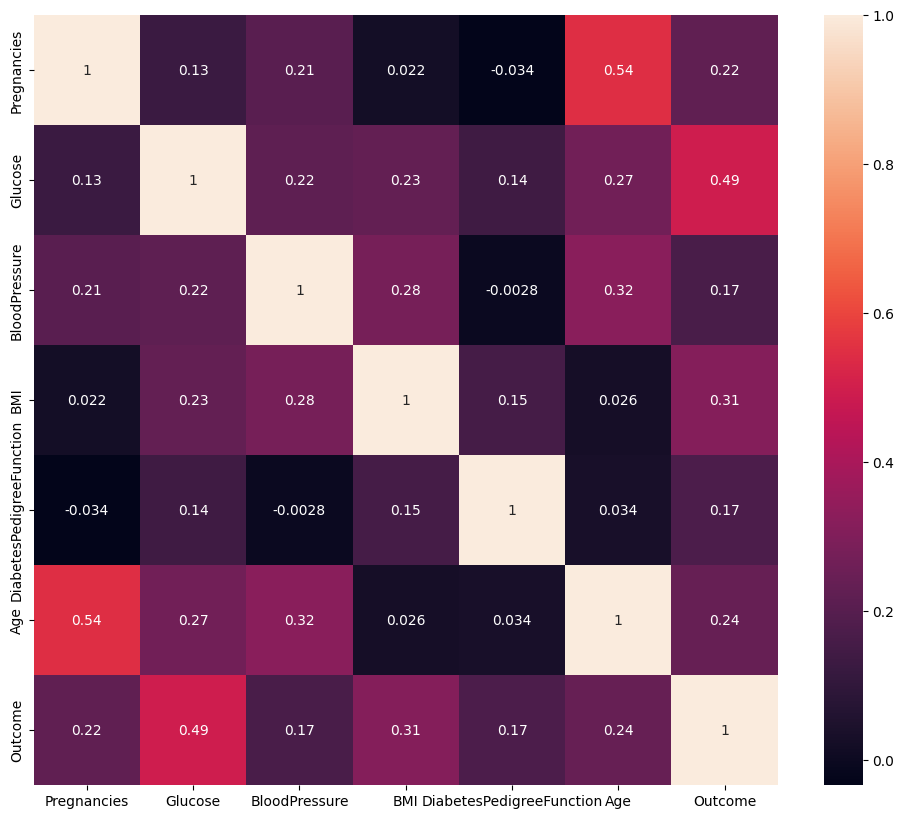

In [75]:
plt.figure(figsize=(12,10))  
# 画热力图，数值为两个变量之间的相关系数
p=sns.heatmap(diabetes_data.corr(), annot=True) 
plt.show()

In [76]:
# 把数据切分为特征x和标签y
x = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [77]:
from sklearn.model_selection import train_test_split
# 切分数据集，stratify=y表示切分后训练集和测试集中的数据类型的比例跟切分前y中的比例一致
# 比如切分前y中0和1的比例为1:2，切分后y_train和y_test中0和1的比例也都是1:2
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, stratify=y)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,y_train)

predictions = LR.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       150
           1       0.66      0.58      0.62        81

    accuracy                           0.75       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.75      0.74       231



<!-- @format -->

# 2 数据准备


<!-- @format -->

## 2.1 导入必要库和包


In [1]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<!-- @format -->

## 2.2 读取数据集

- 该数据集关注放射性碘（RAI）治疗后的甲状腺癌复发。它包含 383 个患者记录，具有 13 个关键属性，包括年龄，性别，癌症分期，病理类型，风险分类，治疗反应和复发状态。这些数据对于预测癌症复发，了解风险因素和评估治疗结果很有价值。

数据集包含以下列：

- Age: 年龄
- Gender: 性别
- Hx Radiotherapy: 是否接受放疗
- Adenopathy: 腺病（淋巴结肿大）情况
- Pathology: 病理类型
- Focality: 病灶集中度
- Risk: 风险等级
- T: 原发肿瘤的大小和/或扩散程度
- N: 区域淋巴结受累情况
- M: 远处转移情况
- Stage: 癌症分期
- Response: 对治疗的反应
- Recurred: 是否复发


In [2]:
# 读取csv格式数据，header=0表示第一行是列名，encoding='utf-8'表示使用utf-8编码
df = pd.read_csv('filtered_thyroid_data.csv',header=0,encoding='utf-8')
# 提取特征数据列名
columns = df.columns.tolist()[:-1]
df.head(15)


,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
5,52,M,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Indeterminate,No
6,41,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
7,46,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
8,51,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
9,40,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


<!-- @format -->

## 2.3 对数据进行初步探索，包括查看数据集的形状，数据类型，缺失值情况等。


In [3]:
# 显示数据集的形状，即数据集中样本的数量和特征的数量。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              383 non-null    int64 
 1   Gender           383 non-null    object
 2   Hx Radiothreapy  383 non-null    object
 3   Adenopathy       383 non-null    object
 4   Pathology        383 non-null    object
 5   Focality         383 non-null    object
 6   Risk             383 non-null    object
 7   T                383 non-null    object
 8   N                383 non-null    object
 9   M                383 non-null    object
 10  Stage            383 non-null    object
 11  Response         383 non-null    object
 12  Recurred         383 non-null    object
dtypes: int64(1), object(12)
memory usage: 39.0+ KB


In [4]:
# 统计各类特征的数据的缺失值情况
print("数据缺失情况:")
print(df.isnull().sum())
print("*"*80)

# 计算每个特征的缺失值占总样本量的比例
missing_values_count = df.isnull().sum()
missing_values_ratio = missing_values_count / len(df) * 100
print("数据缺失比例情况:")
print(missing_values_ratio)
print("*"*80)

# 统计重复样本的个数
duplicate_count = df.duplicated().sum()
print("数据重复情况:",duplicate_count)
print("*"*80)

数据缺失情况:
Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64
********************************************************************************
数据缺失比例情况:
Age                0.0
Gender             0.0
Hx Radiothreapy    0.0
Adenopathy         0.0
Pathology          0.0
Focality           0.0
Risk               0.0
T                  0.0
N                  0.0
M                  0.0
Stage              0.0
Response           0.0
Recurred           0.0
dtype: float64
********************************************************************************
数据重复情况: 53
********************************************************************************


<!-- @format -->

# 3 数据预处理


<!-- @format -->

## 3.1 文本标签映射


In [5]:
# 去除不存在标签的样本
df = df.dropna(subset=['Recurred'])
# 对标签进行映射编码
label, unique_label = pd.factorize(df['Recurred'])
label_dict = {label: idx for idx, label in enumerate(unique_label)}
# 将文字标签转化为数字标签，并添加到数据集中，此时的df的标签已经转化为数字标签
df['label'] = label
print("*"*50)
print("各类标签统计：",df["Recurred"].unique())
# 直接输出标签的个数，即分类的个数
print("*"*50)
print("分类数量：",df["Recurred"].nunique())
print("*"*50)
print("标签映射字典:",label_dict)

**************************************************
各类标签统计： ['No' 'Yes']
**************************************************
分类数量： 2
**************************************************
标签映射字典: {'No': 0, 'Yes': 1}


In [6]:
# 特征矩阵，不包含目标变量。df中去除target列以外的列就是特征。
X = df.drop(['Recurred','label'], axis=1) 
# df的label列是目标变量
y = df['label']

<!-- @format -->

## 3.2 划分训练集和验证集


In [7]:
# train_test_split用于划分训练集和验证集
# test_size=0.3 这个参数就代表30%的样本做验证集
# random_state参数设置随机数种子，保证每次切分运行结果一致。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("训练集样本数量：", X_train.shape[0])
print("测试集样本数量：", X_test.shape[0])

训练集样本数量： 268
测试集样本数量： 115


<!-- @format -->

## 3.3 针对不同特征进行编码处理

后续对分类特征要进行编码处理，这里先检测特征数据的类型，将分类特征数据进行编码处理。
此外，对分类变量和连续变量缺失值填充的方式也有所不同


In [8]:
# 检测特征数据的类型，将分类特征数据进行编码
# categorical_features用于存储分类型特征字段名称
categorical_features = [] 
# continuous_features用于存储连续型特征字段名称
continuous_features = []
for column in X.columns:
    # 检查是否为字符串类型（通常为分类特征）
    if df[column].dtype == 'object':
        categorical_features.append(column)
    # 将其他类型视为连续特征
    else:
        continuous_features.append(column)
print("分类特征:", categorical_features)
print("连续特征:", continuous_features)

分类特征: ['Gender', 'Hx Radiothreapy', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']
连续特征: ['Age']


<!-- @format -->

下面是训练集样本，可以看到顺序已经被打散


In [9]:
X_train

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
335,29,M,No,Extensive,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete
140,28,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
132,32,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
253,38,F,No,No,Follicular,Multi-Focal,Low,T3a,N0,M0,I,Biochemical Incomplete
153,63,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Biochemical Incomplete
...,...,...,...,...,...,...,...,...,...,...,...,...
71,69,F,No,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent
106,26,F,No,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent
270,39,F,No,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Indeterminate
348,58,F,No,Extensive,Papillary,Multi-Focal,Intermediate,T3b,N1b,M0,II,Structural Incomplete


<!-- @format -->

在模型训练之后，要对测试集和真实情况下的模型图例数据做准备，所以对训练的预处理操作，要对测试集和真实推理数据集进行同样操作，所以要保留分类特征的映射字典


In [10]:

encoded_train = X_train.copy()
encoded_test = X_test.copy()
encoders = {}  # 用于保存每个特征的编码器
mapping_dicts = {}  # 用于保存每个特征的映射字典

for feature in categorical_features:
    # 创建标签编码器
    encoder = LabelEncoder()
    
    # 对训练集进行拟合和转换
    encoder.fit(encoded_train[feature])
    
    # 将训练集中的类别与未知类别合并，确保编码器可以处理未知类别
    unique_classes = list(encoder.classes_) + ['Unknown']
    encoder.classes_ = np.array(unique_classes)
    
    # 对训练集进行转换
    encoded_train[feature] = encoder.transform(encoded_train[feature])
    
    # 对验证集进行转换，处理未知类别
    encoded_test[feature] = encoded_test[feature].apply(lambda x: x if x in encoder.classes_[:-1] else 'Unknown')
    encoded_test[feature] = encoder.transform(encoded_test[feature])
    
    # 保存编码器
    encoders[feature] = encoder
    
    # 提取映射字典
    mapping = {cls: idx for idx, cls in enumerate(encoder.classes_)}
    mapping_dicts[feature] = mapping

# 保存分类特征的映射字典
with open('./models/mapping_dicts.pkl', 'wb') as f:
    pickle.dump(mapping_dicts, f)

<!-- @format -->

## 3.4 对训练集和测试集进行简单可视化分析


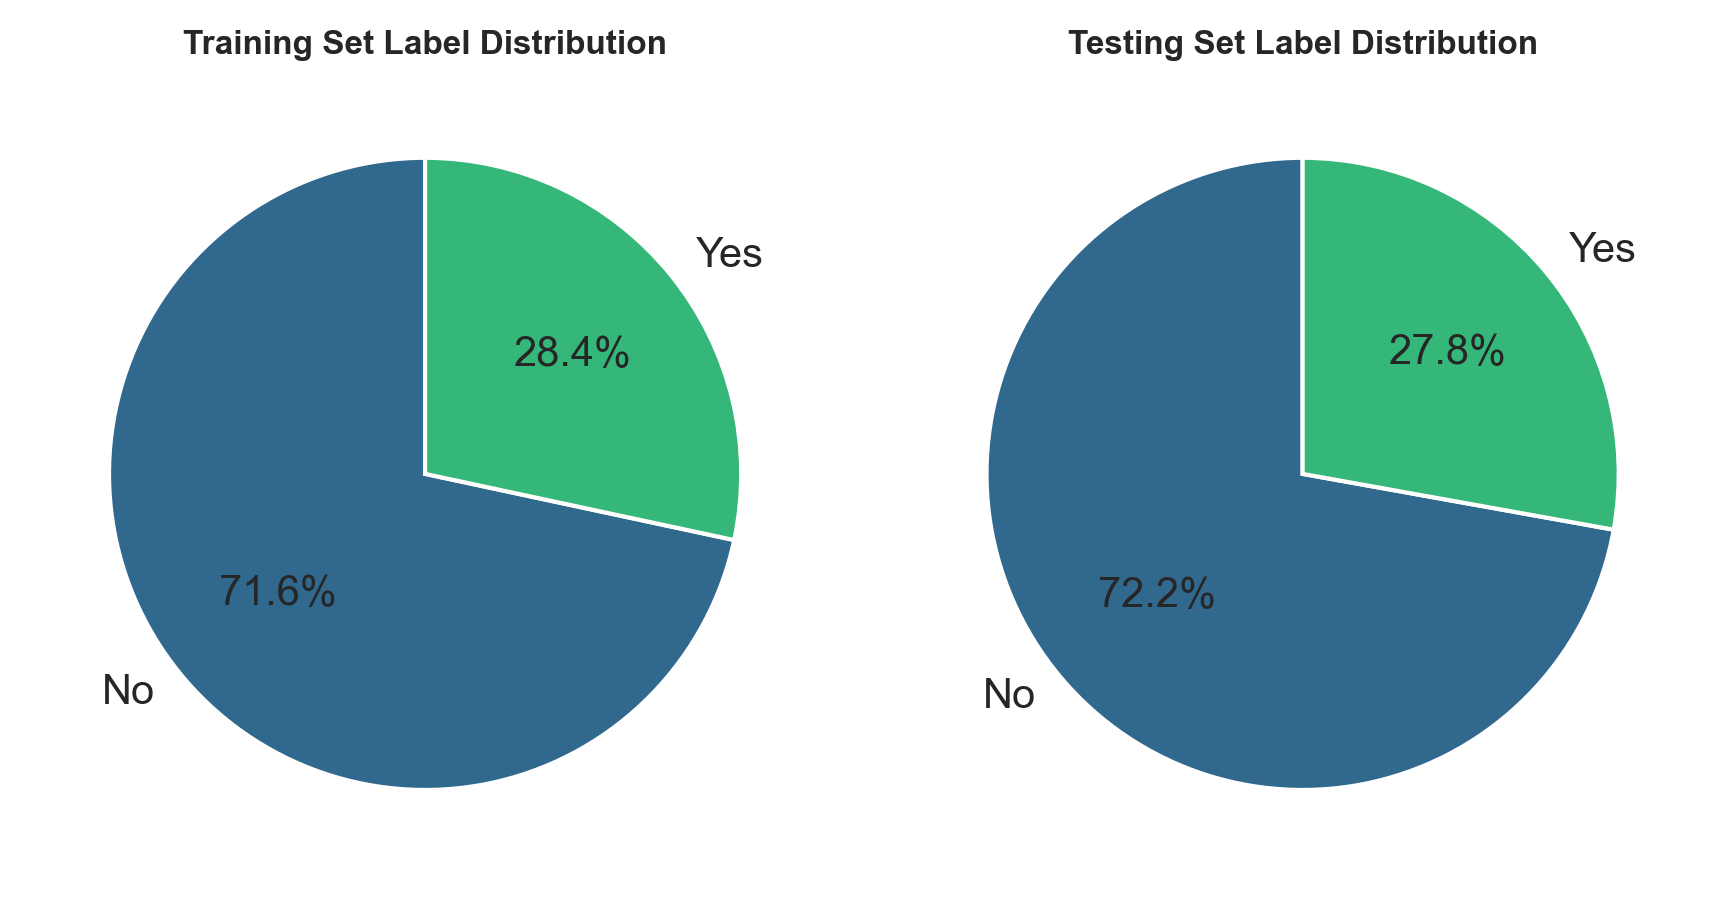

In [11]:
# 反转键值对，为了可视化更清晰，使用标签作为标注
reversed_label_dict = {v: k for k, v in label_dict.items()}
# 计算训练集和测试集的标签占比
train_counts = y_train.value_counts(normalize=True).sort_index()
test_counts = y_test.value_counts(normalize=True).sort_index()

# 使用字典映射标签名称
train_labels = [reversed_label_dict[idx] for idx in train_counts.index]
test_labels = [reversed_label_dict[idx] for idx in test_counts.index]

# 创建图表
plt.figure(figsize=(6, 3), dpi=300)
sns.set_style("whitegrid")

# 绘制训练集饼图
plt.subplot(1, 2, 1)
train_pie = plt.pie(
    train_counts,
    labels=train_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(train_counts)),
    textprops={'fontsize': 10}
)
plt.title("Training Set Label Distribution", fontsize=8, fontweight="bold")

# 绘制测试集饼图
plt.subplot(1, 2, 2)
test_pie = plt.pie(
    test_counts,
    labels=test_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("viridis", len(test_counts)),
    textprops={'fontsize': 10}
)
plt.title("Testing Set Label Distribution", fontsize=8, fontweight="bold")

# 调整布局
plt.tight_layout()

# 保存图表
# plt.savefig("label_distribution_pie.pdf", dpi=300, bbox_inches="tight")
plt.show()

<!-- @format -->

encoded_train 就是经过预处理的模型输入特征


In [12]:
encoded_train

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
335,29,1,0,1,3,0,1,3,2,0,0,3
140,28,0,0,3,3,1,2,2,0,0,0,1
132,32,0,0,3,3,1,2,2,0,0,0,1
253,38,0,0,3,0,0,2,3,0,0,0,0
153,63,0,0,3,3,1,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,69,0,0,3,3,1,2,1,0,0,0,1
106,26,0,0,3,3,1,2,2,0,0,0,1
270,39,0,0,3,3,1,2,3,0,0,0,2
348,58,0,0,1,3,0,1,4,2,0,1,3


<!-- @format -->

## 3.5 模型特征选择

| 特点         | rf 特征选择                                              | corr 特征选择                                                                         | chi2 特征选择                                                     | rfe 特征选择                                                                                                                             | sfs 特征选择                                                                                             |
| ------------ | -------------------------------------------------------- | ------------------------------------------------------------------------------------- | ----------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------- |
| **定义**     | 基于随机森林模型的特征重要性进行选择                     | 通过计算特征与目标变量之间的相关性来选择特征                                          | 利用卡方检验衡量特征与目标变量之间的相关性，适用于分类问题        | 递归地从模型中删除最不重要的特征，直到达到预设的特征数量                                                                                 | 一种顺序特征选择方法，通过迭代地添加或删除特征来评估特征子集的效果                                       |
| **实现方式** | 利用随机森林模型输出的特征重要性排名，选择排名靠前的特征 | 计算特征与目标之间的相关系数（如 Pearson 相关系数），根据绝对值大小选择相关性高的特征 | 对每个特征进行卡方检验，根据卡方统计量或 p 值选择相关性显著的特征 | 以基模型（如逻辑回归、支持向量机等）为核心，每次迭代中根据特征的重要性权重剔除部分特征，重新训练模型并更新特征权重，最终确定最优特征子集 | 从初始特征集开始，逐步添加或删除特征，每次改变特征子集后训练模型并评估性能，选择使模型性能最优的特征子集 |
| **适用场景** | 非线性关系明显、特征间存在复杂交互作用的高维数据         | 目标变量为连续型且与特征呈线性关系的数据，或需初步筛选高度相关特征的场景              | 分类问题中，特征和目标变量均为离散型的数据                        | 当特征数量较多，需要减少特征维度以提高模型性能或防止过拟合时                                                                             | 特征数量适中，且希望通过逐步评估特征子集性能来找到最优组合的场景                                         |
| **优点**     | 能捕捉非线性关系和特征间复杂交互，鲁棒性强               | 计算效率高，易于理解和解释，能快速筛选出与目标强相关的特征                            | 原理简单，计算成本低，适用于处理离散特征和分类问题                | 能充分利用模型的预测性能来评估特征子集，选择的特征子集往往具有较好的模型性能                                                             | 考虑特征之间的交互作用和对模型性能的综合影响，能找到更优的特征组合                                       |
| **缺点**     | 对随机森林模型的参数敏感，且存在过拟合风险               | 只能捕捉线性相关性，无法全面衡量特征与目标的真实关系，且特征之间可能存在多重共线性    | 只适用于分类问题，且特征必须为非负的离散型数据                    | 计算成本高，尤其是特征数量较多时，训练过程复杂耗时                                                                                       | 计算成本较高，尤其是特征数量多或模型训练时间长时，容易陷入局部最优而非全局最优                           |
| **典型算法** | 随机森林（Random Forest）                                | Pearson 相关系数、Spearman 相关系数等                                                 | 卡方检验（Chi-squared Test）                                      | 递归特征消除（Recursive Feature Elimination, RFE）                                                                                       | 顺序前向选择（Sequential Forward Selection, SFS）、顺序后向选择（Sequential Backward Selection, SBS）    |


基于序列特征选择的特征选择
Feature Importances: {'Risk': 1.4602684460028352, 'Response': 1.255795304705581, 'Gender': 0.8886755108452485, 'N': 0.7298266438830926, 'T': 0.5380783445257418, 'Stage': 0.509395108173704, 'M': 0.23483120119669884, 'Pathology': 0.14181668778462656, 'Focality': 0.09696859791513278, 'Adenopathy': 0.08345929830021309, 'Age': 0.018921477256289957, 'Hx Radiothreapy': 0.0002497774869215132}
Selected Features: ['Risk', 'Response', 'Gender', 'N', 'T', 'Stage', 'M', 'Pathology', 'Focality', 'Adenopathy']


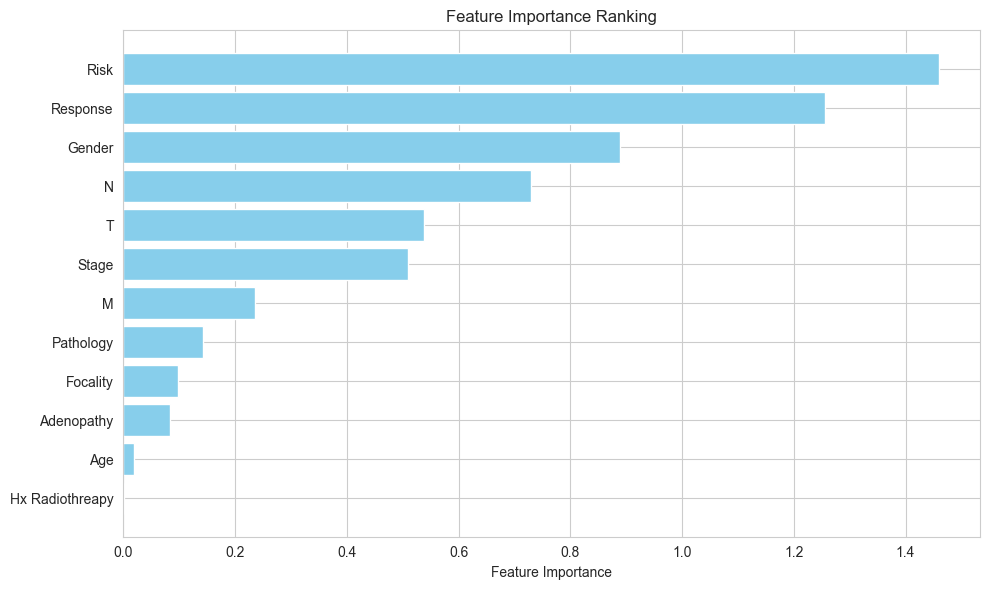

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np

# 只需要改动以下参数即可完成模型特征选择

method = 'sfs'
def feature_selection(X, y, method='rf', k=10, threshold=0.8):
    """
    :param method: 特征选择方法，可选值为 'rf', 'corr', 'chi2', 'rfe', 'sfs'
    :return: 返回按重要度从高到低排序的特征重要度得分字典
    """
    feature_importances = {}
    if method == 'rf':
        print('基于特征重要性的特征选择')
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X, y)
        importances = model.feature_importances_
        feature_importances = dict(zip(X.columns, importances))
        # 按重要度从高到低排序
        sorted_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
    elif method == 'corr':
        print('基于相关性的特征选择')
        corr_matrix = X.corr()
        high_corr_features = set()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if abs(corr_matrix.iloc[i, j]) > threshold:
                    colname = corr_matrix.columns[i]
                    high_corr_features.add(colname)
        selected_features = [col for col in X.columns if col not in high_corr_features]
        # 使用特征与目标变量的相关性作为重要性
        corr_with_target = X.corrwith(y)
        feature_importances = abs(corr_with_target).to_dict()
        # 按重要度从高到低排序
        sorted_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
    elif method == 'chi2':
        print('基于卡方检验的特征选择')
        selector = SelectKBest(chi2, k=min(k, X.shape[1]))
        selector.fit(X, y)
        scores = selector.scores_
        feature_importances = dict(zip(X.columns, scores))
        # 按重要度从高到低排序
        sorted_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
    elif method == 'rfe':
        print('基于递归特征消除的特征选择')
        model = LogisticRegression(max_iter=1000)
        selector = RFE(model, n_features_to_select=k)
        selector.fit(X, y)
        # 使用模型的权重作为特征重要性
        feature_importances = {}
        for feature, support in zip(X.columns, selector.support_):
            if support:
                feature_importances[feature] = abs(selector.estimator_.coef_.ravel()[list(X.columns[selector.support_]).index(feature)])
            else:
                feature_importances[feature] = 0
        # 按重要度从高到低排序
        sorted_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
    elif method == 'sfs':
        print('基于序列特征选择的特征选择')
        model = LogisticRegression(max_iter=1000)
        model.fit(X, y)
        selector = SequentialFeatureSelector(model, n_features_to_select=min(k, X.shape[1]), direction='forward')
        selector.fit(X, y)
        # 使用模型系数作为特征重要性
        coefficients = model.coef_.ravel()
        feature_importances = dict(zip(X.columns, abs(coefficients)))
        # 按重要度从高到低排序
        sorted_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=True))
    else:
        raise ValueError("Invalid method. Choose from 'rf', 'corr', 'chi2', 'rfe', 'sfs'.")
    return sorted_importances

feature_importances = feature_selection(encoded_train,y_train, method=method)
print('Feature Importances:', feature_importances)
# 提取特征名称和重要度数值
feature_names = [item[0] for item in feature_importances.items()]
importance_values = [item[1] for item in feature_importances.items()]
k = 10  # 选择前10个特征
selected_features = feature_names[:k]
print('Selected Features:', selected_features)
# 绘制特征重要度排序图
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_values, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()  # 反转y轴，使最高重要性特征在顶部
plt.tight_layout()
plt.show()

In [14]:
encoded_train = encoded_train[selected_features]
encoded_test = encoded_test[selected_features]

<!-- @format -->

## 3.6 异常值预处理

- 针对特征数量少的数据集或者需要针对摸一个特征进行异常值处理时，可以使用箱线图方法
- 针对特征数量多的数据集，可以使用算法比如 knn、或者基于决策树的算法来检测异常值

本代码提供四种异常值处理的方法，只需要更改 method 参数即可，支持参数：

1. boxplot
2. isolation_forest
3. knn
4. dbscan

| 特点/使用场景 | boxplot                                                                                        | isolation_forest                                                                                   | knn                                                                              | dbscan                                                               |
| ------------- | ---------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- | -------------------------------------------------------------------- |
| **定义**      | 一种基于数据的五数概括（最小值、第一四分位数、中位数、第三四分位数、最大值）来检测异常值的方法 | 一种无监督的异常检测算法，通过随机选择特征和分裂值构建隔离树，较短的路径长度表明样本更可能是异常的 | 一种基于实例的学习算法，用于分类和回归，通过计算样本与相邻样本的距离来识别异常值 | 一种基于密度的聚类算法，用于识别具有相似密度的聚类，也可用于异常检测 |
| **实现方式**  | 计算每个特征的 IQR，确定异常值的上下界                                                         | 随机选择特征和分裂值构建隔离树，计算样本的异常分数                                                 | 计算样本与 k 个最近邻的距离，较大的距离表示更可能是异常值                        | 基于样本的局部密度，密度较低的样本被认为是异常值                     |
| **适用场景**  | 初步探索性数据分析，快速识别明显偏离数据分布的异常值                                           | 处理高维数据和无监督场景下的异常检测                                                               | 处理非线性数据和稀疏数据，适用于中小规模数据集                                   | 处理具有明显密度差异的数据集，可自动确定聚类数目                     |
| **优点**      | 直观易懂，易于实现，对数据分布无假设                                                           | 鲁棒性高，对数据集的分布无假设，适合处理高维数据                                                   | 简单直观，易于解释，适用于中小规模数据集                                         | 能识别任意形状的聚类，无需预先指定聚类数目                           |
| **缺点**      | 可能误删有效数据，对数据分布假设较严格                                                         | 对训练数据中异常比例有要求，异常检测结果依赖于应用场景                                             | 计算成本较高，对 k 值敏感                                                        | 对参数敏感，难以处理具有不同密度的聚类                               |
| **典型应用**  | 数据清洗、初步数据分析                                                                         | 异常检测、离群点分析                                                                               | 异常检测、分类、回归                                                             | 聚类分析、异常检测                                                   |


In [15]:
# 使用箱线图法剔除异常值
def remove_outliers(method, X, y, columns):
    if method == 'boxplot':
        mask = np.ones(len(X), dtype=bool)
        for column in columns:
            Q1 = np.percentile(X[column], 25)
            Q3 = np.percentile(X[column], 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            mask = mask & (X[column] >= lower_bound) & (X[column] <= upper_bound)
        
        outlier_indices = np.where(~mask)[0]  # 获取异常值的索引
        X_filtered = X[mask]
        y_filtered = y[mask]
        
        # 返回结果包括移除异常值后的数据集、标签和异常值的索引
        print("boxplot异常值数量：", len(outlier_indices))
        return X_filtered, y_filtered, outlier_indices, len(outlier_indices)
    
    elif method == 'isolation_forest':
        # 使用孤立森林检测异常值
        from sklearn.ensemble import IsolationForest
        contamination = 0.05
        
        # 创建孤立森林模型
        iso_forest = IsolationForest(contamination=contamination)
        iso_forest.fit(X)
        
        # 预测异常值
        outliers = iso_forest.predict(X)
        
        # 获取异常值的索引
        outlier_indices = np.where(outliers == -1)[0]
        
        # 剔除异常值
        outlier_mask = outliers == 1
        X_filtered = X[outlier_mask]
        y_filtered = y[outlier_mask]
        
        # 计算异常样本的数量
        num_outliers = len(outlier_indices)
        print("isolation_forest异常值数量：", num_outliers)
        
        return X_filtered, y_filtered, outlier_indices, num_outliers
    
    elif method == 'knn':
        # 使用KNN检测异常值
        from sklearn.neighbors import NearestNeighbors
        k = 5  # 最近邻的数目，可以根据数据集大小调整
        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(X)
        distances, _ = knn.kneighbors(X)
        # 最大距离为该点到第k近邻的距离，可以作为异常值的指标
        max_distances = distances[:, -1]
        threshold = np.percentile(max_distances, 90)  # 选择阈值，比如90百分位数
        outlier_indices = np.where(max_distances > threshold)[0]
        
        outlier_mask = np.ones(len(X), dtype=bool)
        outlier_mask[outlier_indices] = False
        X_filtered = X[outlier_mask]
        y_filtered = y[outlier_mask]
        
        print("knn异常值数量：", len(outlier_indices))
        return X_filtered, y_filtered, outlier_indices, len(outlier_indices)
    
    elif method == 'dbscan':
        # 使用DBSCAN检测异常值
        from sklearn.cluster import DBSCAN
        # 参数eps和min_samples需要根据数据集调整
        dbscan = DBSCAN(eps=0.3, min_samples=2)
        dbscan.fit(X)
        # -1标签表示异常值
        outlier_indices = np.where(dbscan.labels_ == -1)[0]
        outlier_mask = np.ones(len(X), dtype=bool)
        outlier_mask[outlier_indices] = False
        X_filtered = X[outlier_mask]
        y_filtered = y[outlier_mask]
        
        print("dbscan异常值数量：", len(outlier_indices))
        return X_filtered, y_filtered, outlier_indices, len(outlier_indices)

encoded_train,y_train,outlier_indices,num_outliers = remove_outliers('isolation_forest',encoded_train.reset_index(drop=True),y_train.reset_index(drop=True),encoded_train.columns)
num_outliers

isolation_forest异常值数量： 14


14

<!-- @format -->

## 3.7 训练集样本不平衡处理

针对训练集样本不均衡的情况，常用的方法有以下三种，只需要改变 imbalanced_method 参数即可：

- 欠采样 under_sampling
- 过采样 over_sampling
- SMOTE 算法

| 特点/使用场景 | 过采样（Oversampling）                       | 欠采样（Undersampling）                                    | SMOTE 算法                                                                 |
| ------------- | -------------------------------------------- | ---------------------------------------------------------- | -------------------------------------------------------------------------- |
| **定义**      | 通过增加少数类样本来平衡数据分布。           | 通过减少多数类样本来平衡数据分布。                         | 一种基于插值的过采样技术，通过在少数类样本之间生成新样本来增加样本多样性。 |
| **实现方式**  | 简单复制少数类样本或生成新样本（如 SMOTE）。 | 随机删除多数类样本或基于聚类等方法删除样本。               | 在少数类样本之间插值生成新的合成样本。                                     |
| **适用场景**  | 数据量充足、非线性问题、需要增加样本多样性。 | 数据量较大、多数类样本数量远超少数类、丢失少数信息影响小。 | 少数类样本数量足够且对样本多样性有要求的场景。                             |
| **优点**      | 不丢失原始数据信息；能更好地捕捉非线性关系。 | 计算成本低；简单易实现。                                   | 增加样本多样性；避免简单复制导致的过拟合。                                 |
| **缺点**      | 可能导致过拟合；计算成本较高。               | 可能丢失重要信息；对边界信息样本不敏感。                   | 少数类样本过少时效果欠佳；数据离散度高或噪声较多时不适用。                 |
| **典型算法**  | 随机过采样、SMOTE、ADASYN 等。               | 随机欠采样、聚类欠采样、近邻法等。                         | SMOTE 及其变种（如 Borderline-SMOTE、SVM-SMOTE 等）。                      |


In [16]:
# 导入必要的库
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

imbalanced_method = 'None'
# 欠采样代码段
if imbalanced_method == 'under_sampling':
    rus = RandomUnderSampler(random_state=42)
    # 对数据进行欠采样
    print(f'原始数据类别分布: {Counter(y_train)}')
    encoded_train, y_train = rus.fit_resample(encoded_train, y_train)
    # 打印采样前后的类别分布情况
    print(f'欠采样后类别分布: {Counter( y_train)}')

elif imbalanced_method == 'over_sampling':
    # 创建过采样对象
    ros = RandomOverSampler(random_state=42)
    # 对数据进行过采样
    print(f'原始数据类别分布: {Counter(y_train)}')
    encoded_train, y_train = ros.fit_resample(encoded_train, y_train)
    # 打印采样前后的类别分布情况
    print(f'过采样后类别分布: {Counter(y_train)}')
# SMOTE算法代码段
elif imbalanced_method == 'smote':
    # 创建SMOTE对象
    smote = SMOTE(random_state=42)
    # 对数据进行SMOTE采样
    print(f'原始数据类别分布: {Counter(y_train)}')
    encoded_train, y_train = smote.fit_resample(encoded_train, y_train)
    # 打印采样前后的类别分布情况
    print(f'SMOTE采样后类别分布: {Counter(y_train)}')
else:
    encoded_train, y_train  = encoded_train, y_train



<!-- @format -->

## 3.8 数据标准化

| 特点             | 标准化（Standardization）                                                                       | 归一化（Normalization）                                                                   |
| ---------------- | ----------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------- |
| **定义**         | 将数据变换为均值为 0，方差为 1 的分布                                                           | 将数据变换到一个指定的范围内（通常是[0, 1]或[-1, 1]）                                     |
| **适用算法**     | 基于距离的算法（如 KNN、K-means）、主成分分析（PCA）、线性判别分析（LDA）、逻辑回归、神经网络等 | 基于梯度下降的算法（如线性回归、逻辑回归、神经网络）、支持向量机（SVM）、聚类算法、KNN 等 |
| **对数据的要求** | 数据大致服从正态分布效果更好（但并非必须）                                                      | 数据的最大值和最小值明确且无极端异常值                                                    |
| **优缺点**       | 不受数据边界值影响，适合处理数据中的离群值；可能对极端值不敏感                                  | 计算简单、易于实现；对数据中的异常值非常敏感                                              |
| **典型场景**     | 当数据分布接近正态分布，或算法对数据分布假设较为严格时                                          | 当数据分布范围未知或数据的最大、最小值明确，且需要将数据限制在某个范围内时                |


In [17]:
# 标准化处理不改变数据的分布，只改变数据尺度
# 通常使用Sklearn库中的StandardScaler对数据进行标准化
scaler_type = 'standard'
if scaler_type == 'standard':
    from sklearn.preprocessing import StandardScaler
    # 初始化StandardScaler对象
    scaler = StandardScaler()
    # 用训练数据拟合scaler
    scaler.fit(encoded_train)
    # 转换训练集和验证集 标准化前的格式是dataframe格式，标准化之后转换成numpy格式X_train_scaled
    X_train_scaled = scaler.transform(encoded_train)
    X_test_scaled = scaler.transform(encoded_test)
elif scaler_type == 'minmax':
    from sklearn.preprocessing import MinMaxScaler
    # 初始化MinMaxScaler对象
    scaler = MinMaxScaler()
    # 用训练数据拟合scaler
    scaler.fit(encoded_train)
    # 转换训练集和验证集 归一化前的格式是dataframe格式，归一化之后转换成numpy格式X_train_scaled
    X_train_scaled = scaler.transform(encoded_train)
    X_test_scaled = scaler.transform(encoded_test)
# 保存标准化模型
dump(scaler, './models/scaler.joblib')

['./models/scaler.joblib']

In [18]:
# 标准化和异常值检测的顺序是具体情况而定
# 如果先标准化再检测异常值，那么检测到的异常值会受标准化影响，所以通常先检测异常值，再标准化

# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
# # 创建一个包含多个特征的箱线图
# plt.figure(figsize=(8, 5),dpi=300)
# sns.set_style("whitegrid")
# # 遍历每个特征并绘制箱线图
# box_df= pd.DataFrame(X_train_scaled,columns=encoded_train.columns)
# colors = ['#9999ff', '#ff9999', '#99ff99', '#ffcc99', '#99ffff', '#ff99ff']
# for i, feature in enumerate(box_df.columns):
#     plt.boxplot(
#         x=box_df[feature],
#         widths=0.5,  # 箱线宽度
#         positions=[i],  # 设置箱线图的位置
#         patch_artist=True,  # 箱体颜色
#         # showmeans=True,     # 显示均值
#         boxprops={'color': 'black', 'facecolor': colors[i % len(colors)]},  # 设置箱体属性
#         flierprops={'marker': 'o', 'markerfacecolor': 'red', 'color': 'black'},  # 设置异常值属性
#         # meanprops={'marker': 'o', 'markerfacecolor': 'indianred'},  # 设置均值点的属性
#         medianprops={'linestyle': '--', 'color': 'black'}  # 设置中位数线的属性
#     )
# # 设置标题和标签
# plt.title('Multiple Feature Box Plots')
# plt.xlabel('Features')
# plt.ylabel('Values')
# xticks = plt.xticks()
# plt.xticks(xticks[0], xticks[1], rotation=45, ha='right', fontsize=8)
# plt.yticks(fontsize=8)
# plt.xticks(ticks=range(len(df.columns)), labels=df.columns)  # 设置x轴刻度标签
# # 显示网格线
# plt.grid(True, linestyle='--', alpha=0.7)
# # 添加图例
# for i, feature in enumerate(df.columns):
#     plt.scatter([], [], c=colors[i % len(colors)], label=feature)
# plt.legend(loc='lower right',fontsize=5)
# plt.tight_layout()
# plt.show()

<!-- @format -->

## 3.9 模型训练及结果可视化


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report 
# 结果存储列表
results = []
# 定义函数用于计算分类模型指标
def evaluate_classification_model(model_name, y_test, y_pred):
    # 计算准确率、精确率、召回率
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='macro')  # 使用加权平均
    precision = precision_score(y_test, y_pred,average='macro')  # 使用加权平均
    return accuracy, precision, recall

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
def plot_confusion_matrix(model_name,y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # 设置中文字体支持
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

    # 绘制混淆矩阵
    fig, ax = plt.subplots(figsize=(8, 6))  # 设置图形大小
    disp.plot(ax=ax, cmap=plt.cm.Blues)  # 设置颜色映射和x轴标签旋转

    # 设置标题和标签的字体大小
    ax.set_title(f'{model_name} Confusion Matrix\n', fontsize=16)  # 设置标题
    ax.set_xlabel('Predicted Labels', fontsize=15)  # 设置x轴标签
    ax.set_ylabel('True Labels', fontsize=15)  # 设置y轴标签
    for text in disp.text_.ravel():
        text.set_fontsize(14) 

    # 设置颜色条的字体大小
    cbar = ax.images[0].colorbar
    cbar.ax.tick_params(labelsize=10)  # 设置颜色条刻度标签的字体大小

    # 设置网格不可见
    plt.grid(False)
    plt.show()

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
def plot_roc_curves(models, X_test, y_test, labels=None, colors=None, figsize=(8, 6)):

    # 如果只有一个模型，将其转换为列表
    if not isinstance(models, list):
        models = [models]
    # 如果未提供标签，默认为空列表
    if labels is None:
        labels = [f'Model {i+1}' for i in range(len(models))]
    # 如果未提供颜色，默认循环颜色
    if colors is None:
        colors = ['darkorange', 'darkred', 'darkblue', 'darksalmon', 
                  'fuchsia', 'darkorchid', 'burlywood', 'sienna']
    plt.figure(figsize=figsize)
    for model, label, color in zip(models, labels, colors):
        # 计算预测概率（正类）
        y_proba = model.predict_proba(X_test)[:, 1]
        # 计算ROC曲线和AUC值
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        # 绘制曲线
        plt.plot(fpr, tpr, color=color, lw=1, label=f'{label} (AUC = {roc_auc:.2f})')
    # 添加对角线
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # 设置坐标轴范围、标签、标题
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve', fontsize=14)
    plt.legend(loc="lower right", fontsize=12)
    plt.grid(True)
    plt.show()

# # 单个模型绘制
# plot_roc_curves(LogisticRegression_model, X_test_scaled, y_test, labels=['Logistic Regression'], colors=['darkorange'])

# # 多个模型绘制
# models_list = [LogisticRegression_model, dt_model, svm_model, rf_model, knn_model, nb_model, xgb_model, ada_model]
# labels_list = ['LR', 'DT', 'SVM', 'RF', 'KNN', 'NB', 'XGBoost', 'AdaBoost']
# colors_list = ['darkorange', 'darkred', 'darkblue', 'darksalmon', 'fuchsia', 'darkorchid', 'burlywood', 'sienna']

# plot_roc_curves(models_list, X_test_scaled, y_test, labels=labels_list, colors=colors_list)

<!-- @format -->

### LogisticRegression 逻辑回归模型


LogisticRegression_model: 
训练集准确率=0.9094
训练集精确率=0.8787
训练集召回率=0.8746
****************************************************************************************************
LogisticRegression_model: 
测试集准确率=0.9304
测试集精确率=0.9206
测试集召回率=0.9038
LogisticRegression_model测试集classification_report : 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        83
           1       0.90      0.84      0.87        32

    accuracy                           0.93       115
   macro avg       0.92      0.90      0.91       115
weighted avg       0.93      0.93      0.93       115

****************************************************************************************************


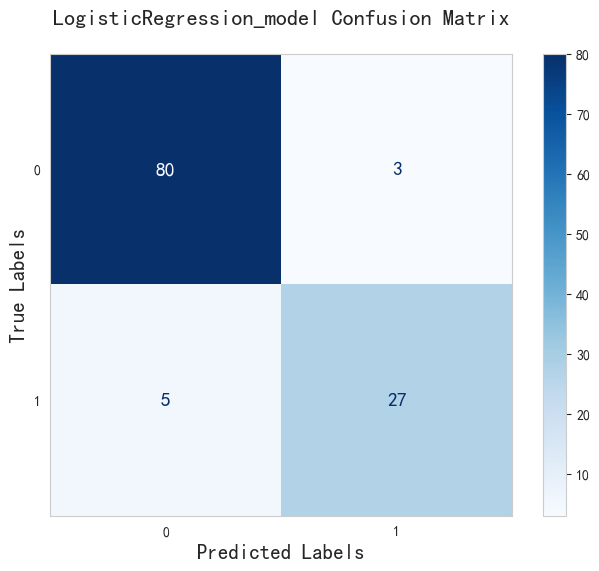

****************************************************************************************************


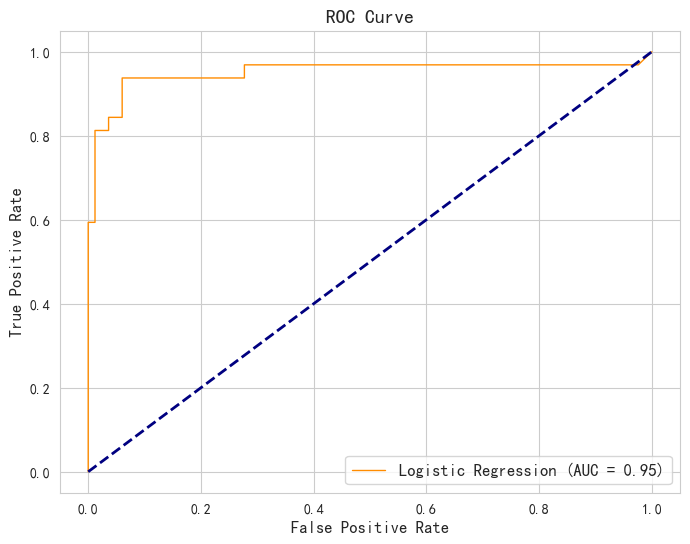

In [22]:
from sklearn.linear_model import LogisticRegression  # 导入LogisticRegression模型
# 初始化逻辑回归模型
LogisticRegression_model = LogisticRegression(max_iter=5000)
model_name = "LogisticRegression_model"
# 在训练集上训练模型
LogisticRegression_model.fit(X_train_scaled, y_train)
# 在验证集上进行预测
y_train_pred_lr = LogisticRegression_model.predict(X_train_scaled)
y_test_pred_lr = LogisticRegression_model.predict(X_test_scaled)

train_accuracy, train_precision, train_recall = evaluate_classification_model(model_name, y_train, y_train_pred_lr)
test_accuracy, test_precision, test_recall = evaluate_classification_model(model_name, y_test, y_test_pred_lr)
results.append({
    "Model": model_name,
    "Accuracy": test_accuracy,
    "Precision": test_precision,
    "Recall": test_recall
})

print(f"{model_name}: \n训练集准确率={train_accuracy:.4f}\n训练集精确率={train_precision:.4f}\n训练集召回率={train_recall:.4f}")
print("*"*100)
print(f"{model_name}: \n测试集准确率={test_accuracy:.4f}\n测试集精确率={test_precision:.4f}\n测试集召回率={test_recall:.4f}")
print(f"{model_name}测试集classification_report : \n")
print(classification_report(y_test, y_test_pred_lr))
print("*" * 100)
plot_confusion_matrix(model_name,y_test, y_test_pred_lr)
print("*" * 100)
plot_roc_curves(LogisticRegression_model, X_test_scaled, y_test, labels=['Logistic Regression'], colors=['darkorange'])


In [23]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# # 初始化逻辑回归模型
# LogisticRegression_model = LogisticRegression(max_iter=5000)
# model_name = "LogisticRegression_model"

# # 定义需要计算的指标
# scoring = {
#     'accuracy': make_scorer(accuracy_score),
#     'precision': make_scorer(precision_score),
#     'recall': make_scorer(recall_score)
# }
# # 使用 cross_validate 进行五折交叉验证
# cv_results = cross_validate(LogisticRegression_model, X_train_scaled, y_train, cv=5, scoring=scoring, return_train_score=True)

# # 将交叉验证结果存储到 DataFrame 中
# cv_df = pd.DataFrame({
#     'Fold': [f'Fold {i+1}' for i in range(5)] + ['Average'],
#     'Train Accuracy': list(cv_results['train_accuracy']) + [cv_results['train_accuracy'].mean()],
#     'Train Precision': list(cv_results['train_precision']) + [cv_results['train_precision'].mean()],
#     'Train Recall': list(cv_results['train_recall']) + [cv_results['train_recall'].mean()],
#     'Test Accuracy': list(cv_results['test_accuracy']) + [cv_results['test_accuracy'].mean()],
#     'Test Precision': list(cv_results['test_precision']) + [cv_results['test_precision'].mean()],
#     'Test Recall': list(cv_results['test_recall']) + [cv_results['test_recall'].mean()]
# })
# # 将平均值保留四位小数
# cv_df.loc[5, 'Train Accuracy':] = cv_df.loc[5, 'Train Accuracy':].apply(lambda x: round(x, 4))
# cv_df.iloc[:5, 1:] = cv_df.iloc[:5, 1:].applymap(lambda x: round(x, 4))

# # 输出 DataFrame
# cv_df

<!-- @format -->

### RandomForest 随机森林模型


RandomForest_model: 
训练集准确率=1.0000
训练集精确率=1.0000
训练集召回率=1.0000
****************************************************************************************************
RandomForest_model: 
测试集准确率=0.9652
测试集精确率=0.9567
测试集召回率=0.9567
RandomForest_model测试集classification_report : 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        83
           1       0.94      0.94      0.94        32

    accuracy                           0.97       115
   macro avg       0.96      0.96      0.96       115
weighted avg       0.97      0.97      0.97       115

****************************************************************************************************


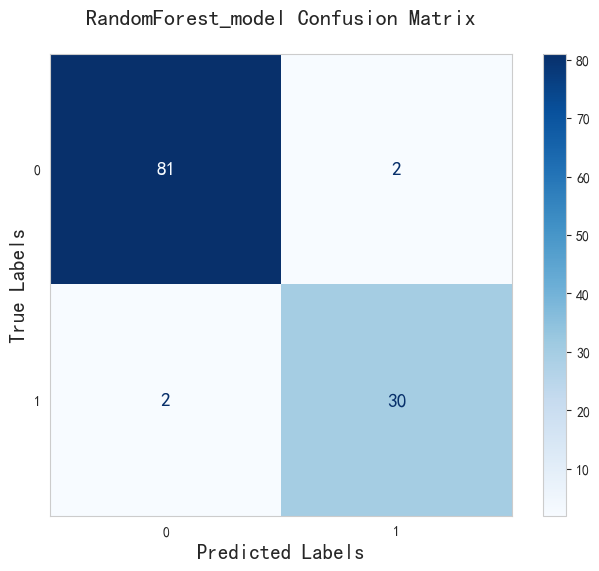

****************************************************************************************************


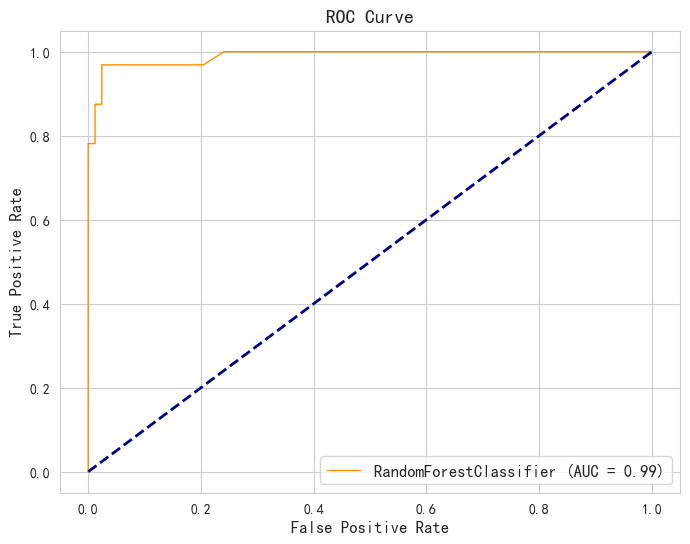

In [24]:
from sklearn.ensemble import RandomForestClassifier  # 导入随机森林分类器

# 初始化随机森林模型
rf_model = RandomForestClassifier(n_estimators=100,  # 决策树数量
                                            random_state=42)   # 随机种子
model_name = "RandomForest_model"

# 在训练集上训练模型
rf_model.fit(X_train_scaled, y_train)

# 在训练集和测试集上进行预测
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# 计算训练集和测试集的评估指标
train_accuracy, train_precision, train_recall = evaluate_classification_model(model_name, y_train, y_train_pred_rf)
test_accuracy, test_precision, test_recall = evaluate_classification_model(model_name, y_test, y_test_pred_rf)
results.append({
    "Model": model_name,
    "Accuracy": test_accuracy,
    "Precision": test_precision,
    "Recall": test_recall
})

# 打印结果
print(f"{model_name}: \n训练集准确率={train_accuracy:.4f}\n训练集精确率={train_precision:.4f}\n训练集召回率={train_recall:.4f}")
print("*"*100)
print(f"{model_name}: \n测试集准确率={test_accuracy:.4f}\n测试集精确率={test_precision:.4f}\n测试集召回率={test_recall:.4f}")
print(f"{model_name}测试集classification_report : \n")
print(classification_report(y_test, y_test_pred_rf))
print("*" * 100)
plot_confusion_matrix(model_name,y_test, y_test_pred_rf)
print("*" * 100)
plot_roc_curves(rf_model, X_test_scaled, y_test, labels=['RandomForestClassifier'], colors=['darkorange'])

<!-- @format -->

### XGBoost 分类模型


XGB_model: 
训练集准确率=0.9803
训练集精确率=0.9808
训练集召回率=0.9803
****************************************************************************************************
XGB_model: 
测试集准确率=0.9652
测试集精确率=0.9653
测试集召回率=0.9652
XGB_model测试集classification_report : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        83
           1       0.97      0.91      0.94        32

    accuracy                           0.97       115
   macro avg       0.97      0.95      0.96       115
weighted avg       0.97      0.97      0.96       115

****************************************************************************************************


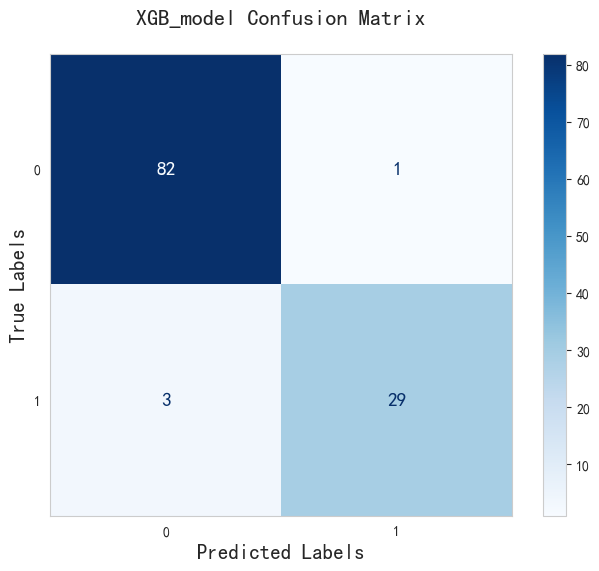

****************************************************************************************************


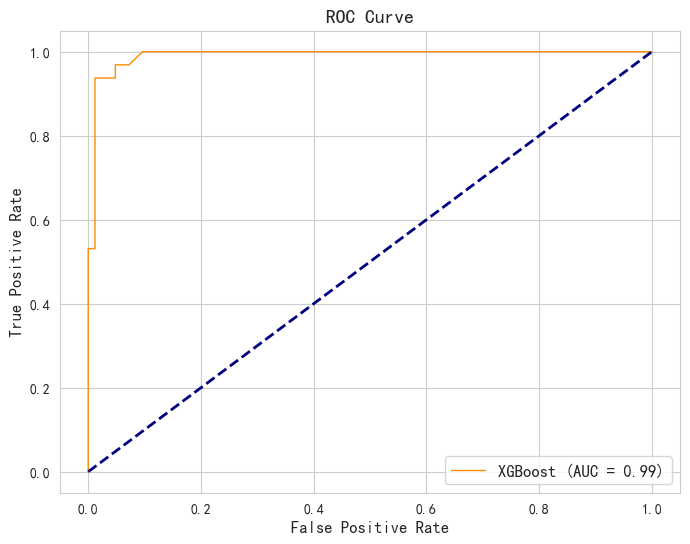

In [25]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# 初始化 XGBoost 模型
xgb_model = xgb.XGBClassifier(n_estimators=100,  # 树的数量
                              learning_rate=0.1,  # 学习率
                              max_depth=3,       # 树的最大深度
                              objective='binary:logistic',  # 目标函数
                              random_state=42)   # 随机种子
model_name = "XGB_model"

# 在训练集上训练模型
xgb_model.fit(X_train_scaled, y_train)

# 在训练集和测试集上进行预测
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# 计算训练集和测试集的评估指标
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
train_precision = precision_score(y_train, y_train_pred_xgb, average='weighted')
train_recall = recall_score(y_train, y_train_pred_xgb, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)
test_precision = precision_score(y_test, y_test_pred_xgb, average='weighted')
test_recall = recall_score(y_test, y_test_pred_xgb, average='weighted')
results.append({
    "Model": model_name,
    "Accuracy": test_accuracy,
    "Precision": test_precision,
    "Recall": test_recall
})

# 打印结果
print(f"{model_name}: \n训练集准确率={train_accuracy:.4f}\n训练集精确率={train_precision:.4f}\n训练集召回率={train_recall:.4f}")
print("*"*100)
print(f"{model_name}: \n测试集准确率={test_accuracy:.4f}\n测试集精确率={test_precision:.4f}\n测试集召回率={test_recall:.4f}")
print(f"{model_name}测试集classification_report : \n")
print(classification_report(y_test, y_test_pred_xgb))
print("*" * 100)
plot_confusion_matrix(model_name,y_test, y_test_pred_xgb)
print("*" * 100)

plot_roc_curves(xgb_model, X_test_scaled, y_test, labels=['XGBoost'], colors=['darkorange'])

<!-- @format -->

### SVM 支持向量机模型


SVM_model: 
训练集准确率=0.9528
训练集精确率=0.9526
训练集召回率=0.9528
****************************************************************************************************
SVM_model: 
测试集准确率=0.9565
测试集精确率=0.9563
测试集召回率=0.9565
SVM_model测试集classification_report : 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.94      0.91      0.92        32

    accuracy                           0.96       115
   macro avg       0.95      0.94      0.95       115
weighted avg       0.96      0.96      0.96       115

****************************************************************************************************


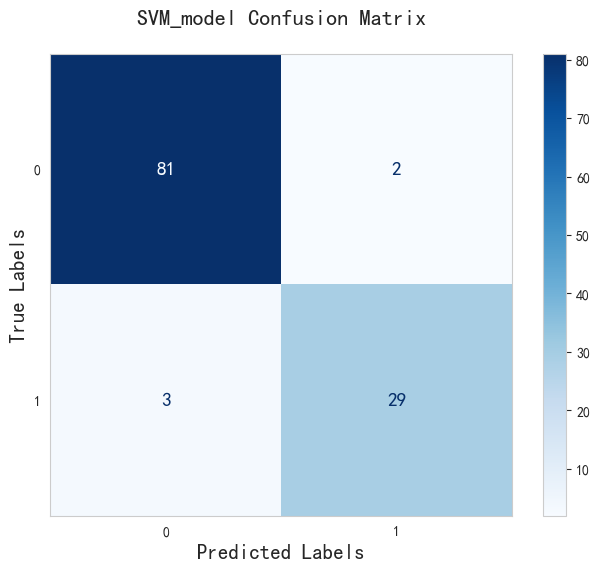

****************************************************************************************************


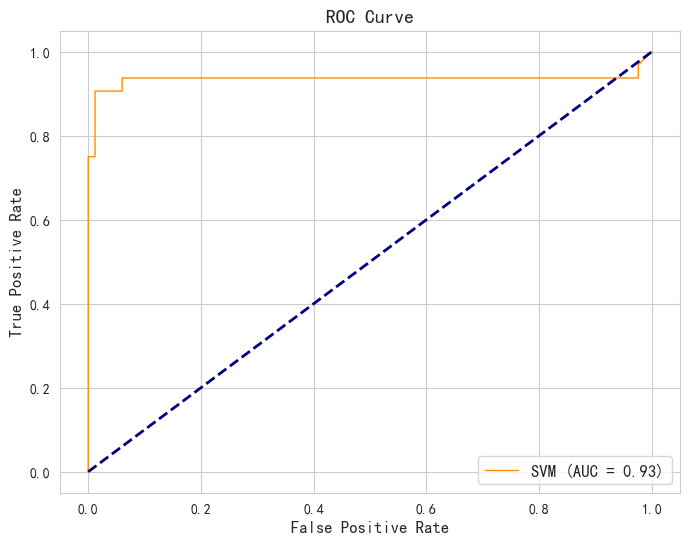

In [26]:
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# 初始化支持向量机模型
svm_model = svm.SVC(kernel='linear',  # 使用线性核
                    probability=True,
                    random_state=42)  # 随机种子
model_name = "SVM_model"

# 在训练集上训练模型
svm_model.fit(X_train_scaled, y_train)

# 在训练集和测试集上进行预测
y_train_pred_svm = svm_model.predict(X_train_scaled)
y_test_pred_svm = svm_model.predict(X_test_scaled)

# 计算训练集和测试集的评估指标
train_accuracy = accuracy_score(y_train, y_train_pred_svm)
train_precision = precision_score(y_train, y_train_pred_svm, average='weighted')
train_recall = recall_score(y_train, y_train_pred_svm, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred_svm)
test_precision = precision_score(y_test, y_test_pred_svm, average='weighted')
test_recall = recall_score(y_test, y_test_pred_svm, average='weighted')
results.append({
    "Model": model_name,
    "Accuracy": test_accuracy,
    "Precision": test_precision,
    "Recall": test_recall
})

# 打印结果
print(f"{model_name}: \n训练集准确率={train_accuracy:.4f}\n训练集精确率={train_precision:.4f}\n训练集召回率={train_recall:.4f}")
print("*"*100)
print(f"{model_name}: \n测试集准确率={test_accuracy:.4f}\n测试集精确率={test_precision:.4f}\n测试集召回率={test_recall:.4f}")
print(f"{model_name}测试集classification_report : \n")
print(classification_report(y_test, y_test_pred_svm))
print("*" * 100)
plot_confusion_matrix(model_name,y_test, y_test_pred_svm)
print("*" * 100)
plot_roc_curves(svm_model, X_test_scaled, y_test, labels=['SVM'], colors=['darkorange'])

<!-- @format -->

### LightGBM 分类模型


LightGBM_model: 
训练集准确率=0.9843
训练集精确率=0.9846
训练集召回率=0.9843
****************************************************************************************************
LightGBM_model: 
测试集准确率=0.9652
测试集精确率=0.9653
测试集召回率=0.9652
LightGBM_model测试集classification_report : 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        83
           1       0.97      0.91      0.94        32

    accuracy                           0.97       115
   macro avg       0.97      0.95      0.96       115
weighted avg       0.97      0.97      0.96       115

****************************************************************************************************


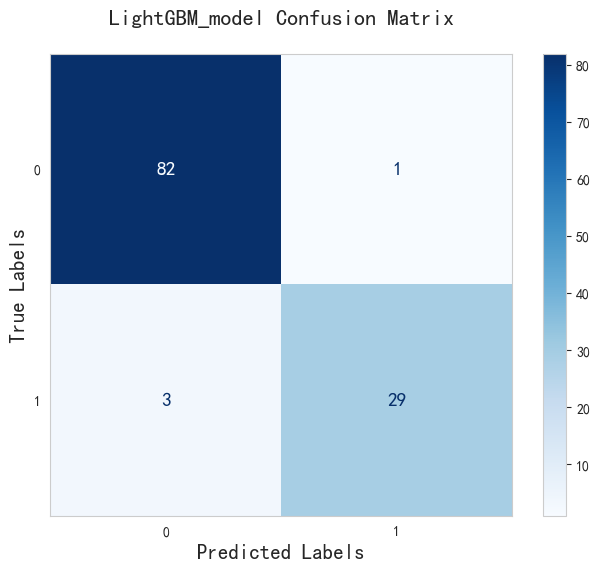

****************************************************************************************************


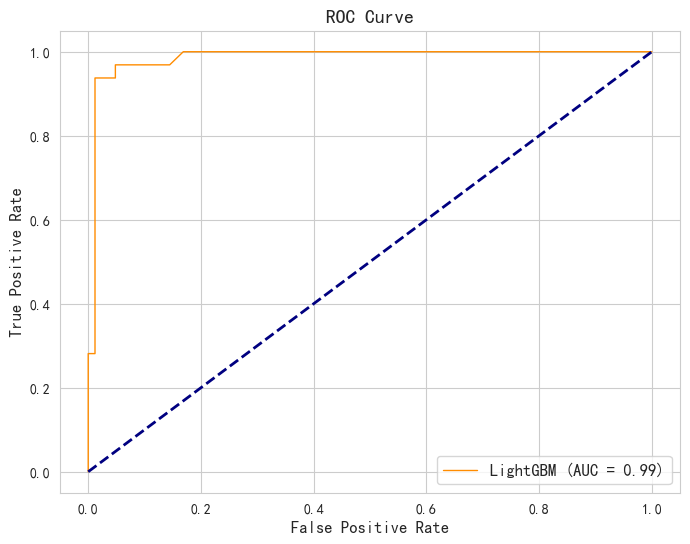

In [27]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# 初始化 LightGBM 模型
lgb_model = lgb.LGBMClassifier(n_estimators=100,  # 树的数量
                                    learning_rate=0.1,  # 学习率
                                    max_depth=3,       # 树的最大深度
                                    objective='binary',  # 目标函数
                                    verbose=-1,
                                    random_state=42)   # 随机种子
model_name = "LightGBM_model"

# 在训练集上训练模型
lgb_model.fit(X_train_scaled, y_train)

# 在训练集和测试集上进行预测
y_train_pred_lgb = lgb_model.predict(X_train_scaled)
y_test_pred_lgb = lgb_model.predict(X_test_scaled)

# 计算训练集和测试集的评估指标
train_accuracy = accuracy_score(y_train, y_train_pred_lgb)
train_precision = precision_score(y_train, y_train_pred_lgb, average='weighted')
train_recall = recall_score(y_train, y_train_pred_lgb, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred_lgb)
test_precision = precision_score(y_test, y_test_pred_lgb, average='weighted')
test_recall = recall_score(y_test, y_test_pred_lgb, average='weighted')
results.append({
    "Model": model_name,
    "Accuracy": test_accuracy,
    "Precision": test_precision,
    "Recall": test_recall
})

# 打印结果
print(f"{model_name}: \n训练集准确率={train_accuracy:.4f}\n训练集精确率={train_precision:.4f}\n训练集召回率={train_recall:.4f}")
print("*"*100)
print(f"{model_name}: \n测试集准确率={test_accuracy:.4f}\n测试集精确率={test_precision:.4f}\n测试集召回率={test_recall:.4f}")
print(f"{model_name}测试集classification_report : \n")
print(classification_report(y_test, y_test_pred_lgb))
print("*" * 100)
plot_confusion_matrix(model_name,y_test, y_test_pred_lgb)
print("*" * 100)
plot_roc_curves(lgb_model, X_test_scaled, y_test, labels=['LightGBM'], colors=['darkorange'])

<!-- @format -->

### GaussianNB 朴素贝叶斯模型


nb_model: 
训练集准确率=0.8976
训练集精确率=0.8972
训练集率召回=0.8976
****************************************************************************************************
nb_model: 
测试集准确率=0.9043
测试集精确率=0.9095
测试集召回率=0.9043
nb_model测试集 classification_report : 

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        83
           1       0.96      0.69      0.80        32

    accuracy                           0.90       115
   macro avg       0.92      0.84      0.87       115
weighted avg       0.91      0.90      0.90       115

****************************************************************************************************


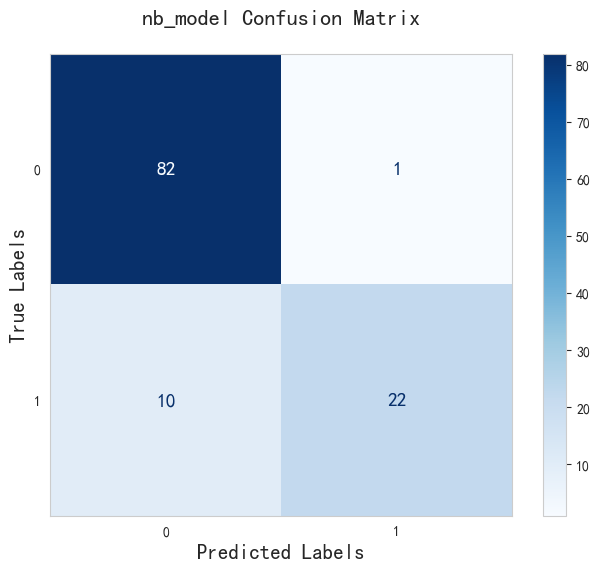

****************************************************************************************************


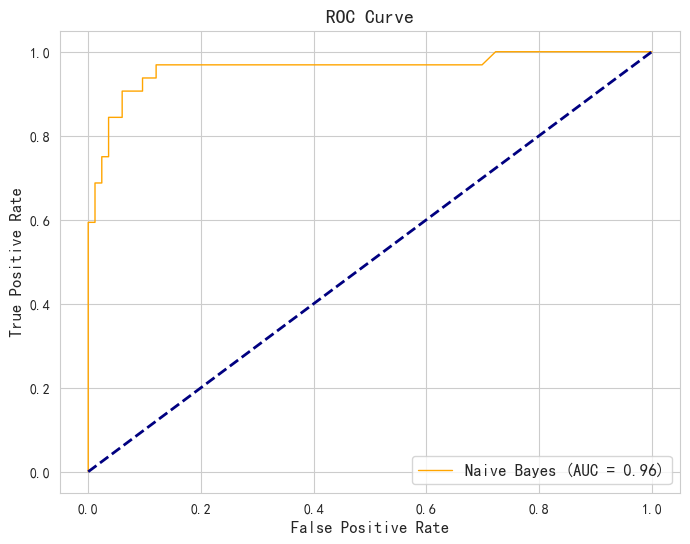

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# 初始化朴素贝叶斯模型
nb_model = GaussianNB()  # 使用高斯朴素贝叶斯
model_name = "nb_model"

# 在训练集上训练模型
nb_model.fit(X_train_scaled, y_train)

# 在训练集和测试集上进行预测
y_train_pred_nb = nb_model.predict(X_train_scaled)
y_test_pred_nb = nb_model.predict(X_test_scaled)

# 计算训练集和测试集的评估指标
train_accuracy = accuracy_score(y_train, y_train_pred_nb)
train_precision = precision_score(y_train, y_train_pred_nb, average='weighted')
train_recall = recall_score(y_train, y_train_pred_nb, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred_nb)
test_precision = precision_score(y_test, y_test_pred_nb, average='weighted')
test_recall = recall_score(y_test, y_test_pred_nb, average='weighted')
results.append({
    "Model": model_name,
    "Accuracy": test_accuracy,
    "Precision": test_precision,
    "Recall": test_recall
})

# 打印结果
print(f"{model_name}: \n训练集准确率={train_accuracy:.4f}\n训练集精确率={train_precision:.4f}\n训练集率召回={train_recall:.4f}")
print("*" * 100)
print(f"{model_name}: \n测试集准确率={test_accuracy:.4f}\n测试集精确率={test_precision:.4f}\n测试集召回率={test_recall:.4f}")
print(f"{model_name}测试集 classification_report : \n")
print(classification_report(y_test, y_test_pred_nb))
print("*" * 100)
plot_confusion_matrix(model_name,y_test, y_test_pred_nb)
print("*" * 100)
plot_roc_curves(nb_model, X_test_scaled, y_test, labels=['Naive Bayes'], colors=['orange'])

<!-- @format -->

### AdaBoost 分类模型


AdaBoost_model: 
训练集准确率=0.9528
训练集精确率=0.9541
训练集召回率=0.9528
****************************************************************************************************
AdaBoost_model: 
测试集准确率=0.9565
测试集精确率=0.9568
测试集召回率=0.9565
AdaBoost_model测试集classification_report : 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.97      0.88      0.92        32

    accuracy                           0.96       115
   macro avg       0.96      0.93      0.94       115
weighted avg       0.96      0.96      0.96       115

****************************************************************************************************


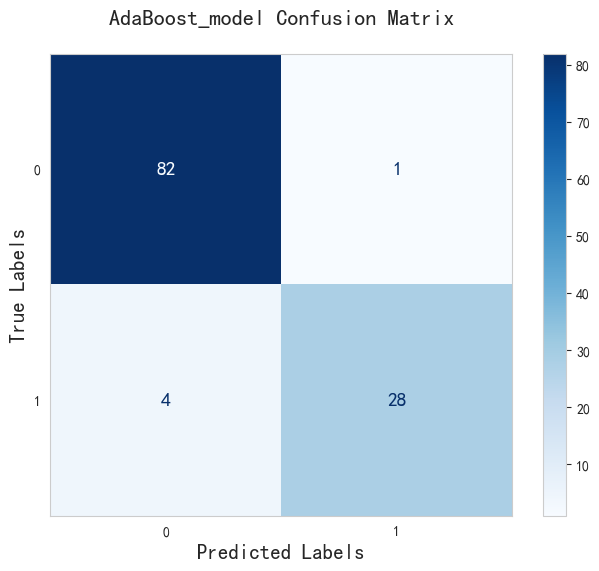

****************************************************************************************************


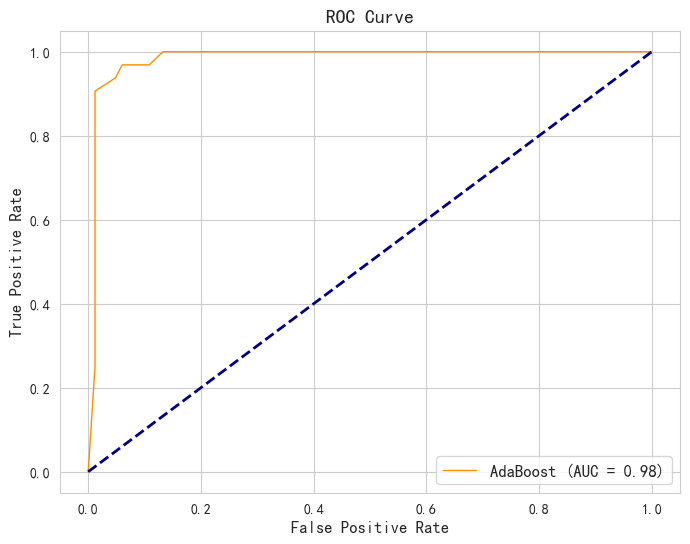

In [29]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# 初始化 AdaBoost 模型
ada_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),  # 基学习器
                                    n_estimators=100,  # 基学习器的数量
                                    learning_rate=0.1,  # 学习率
                                    random_state=42)   # 随机种子
model_name = "AdaBoost_model"

# 在训练集上训练模型
ada_model.fit(X_train_scaled, y_train)

# 在训练集和测试集上进行预测
y_train_pred_ada = ada_model.predict(X_train_scaled)
y_test_pred_ada = ada_model.predict(X_test_scaled)

# 计算训练集和测试集的评估指标
train_accuracy = accuracy_score(y_train, y_train_pred_ada)
train_precision = precision_score(y_train, y_train_pred_ada, average='weighted')
train_recall = recall_score(y_train, y_train_pred_ada, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred_ada)
test_precision = precision_score(y_test, y_test_pred_ada, average='weighted')
test_recall = recall_score(y_test, y_test_pred_ada, average='weighted')
results.append({
    "Model": model_name,
    "Accuracy": test_accuracy,
    "Precision": test_precision,
    "Recall": test_recall
})

# 打印结果
print(f"{model_name}: \n训练集准确率={train_accuracy:.4f}\n训练集精确率={train_precision:.4f}\n训练集召回率={train_recall:.4f}")
print("*"*100)
print(f"{model_name}: \n测试集准确率={test_accuracy:.4f}\n测试集精确率={test_precision:.4f}\n测试集召回率={test_recall:.4f}")
print(f"{model_name}测试集classification_report : \n")
print(classification_report(y_test, y_test_pred_ada))
print("*" * 100)
plot_confusion_matrix(model_name,y_test, y_test_pred_ada)
print("*" * 100)
plot_roc_curves(ada_model, X_test_scaled, y_test, labels=['AdaBoost'], colors=['darkorange'])

<!-- @format -->

### KNN 分类算法


KNN_model: 
训练集准确率=0.9094
训练集精确率=0.9080
训练集召回率=0.9094
****************************************************************************************************
KNN_model: 
测试集准确率=0.9043
测试集精确率=0.9056
测试集召回率=0.9043
KNN_model测试集classification_report : 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        83
           1       0.92      0.72      0.81        32

    accuracy                           0.90       115
   macro avg       0.91      0.85      0.87       115
weighted avg       0.91      0.90      0.90       115

****************************************************************************************************


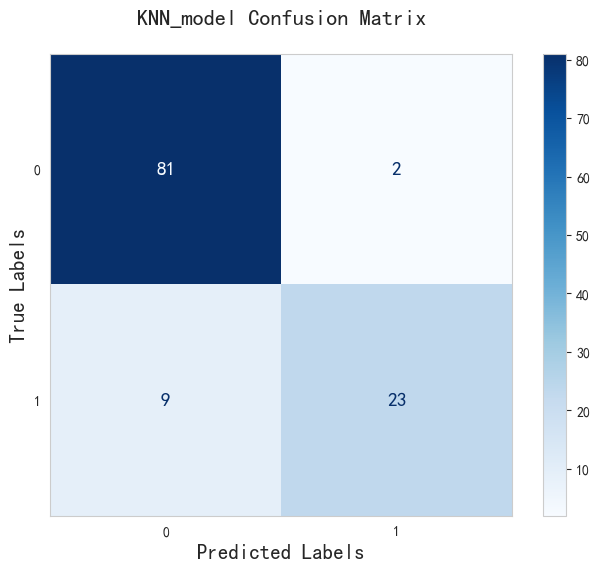

****************************************************************************************************


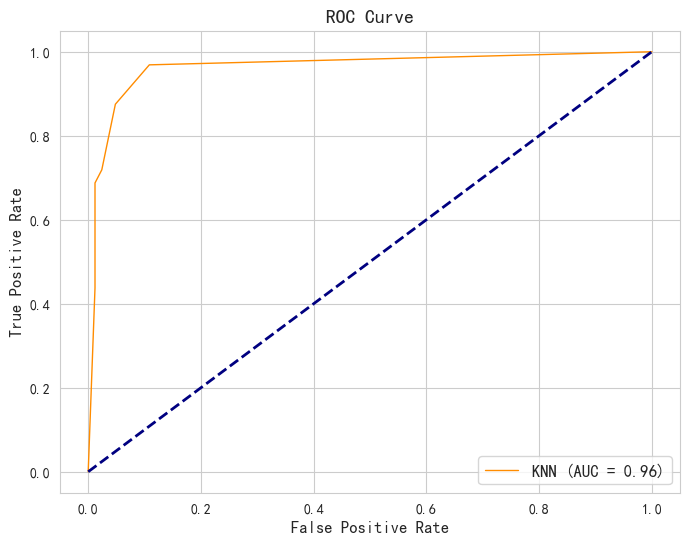

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import numpy as np

# 初始化 KNN 模型
knn_model = KNeighborsClassifier(n_neighbors=5,  # 邻居数量
                                 weights='uniform',  # 权重类型（uniform/distance）
                                 algorithm='auto',  # 算法选择
                                 leaf_size=30,      # 叶子大小
                                 p=2,               # 距离度量（p=1曼哈顿，p=2欧氏）
                                 metric='minkowski')  # 距离度量方法
model_name = "KNN_model"

# 在训练集上训练模型
knn_model.fit(X_train_scaled, y_train)

# 在训练集和测试集上进行预测
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

# 计算训练集和测试集的评估指标
train_accuracy = accuracy_score(y_train, y_train_pred_knn)
train_precision = precision_score(y_train, y_train_pred_knn, average='weighted')
train_recall = recall_score(y_train, y_train_pred_knn, average='weighted')
test_accuracy = accuracy_score(y_test, y_test_pred_knn)
test_precision = precision_score(y_test, y_test_pred_knn, average='weighted')
test_recall = recall_score(y_test, y_test_pred_knn, average='weighted')
results.append({
    "Model": model_name,
    "Accuracy": test_accuracy,
    "Precision": test_precision,
    "Recall": test_recall
})

# 打印结果
print(f"{model_name}: \n训练集准确率={train_accuracy:.4f}\n训练集精确率={train_precision:.4f}\n训练集召回率={train_recall:.4f}")
print("*"*100)
print(f"{model_name}: \n测试集准确率={test_accuracy:.4f}\n测试集精确率={test_precision:.4f}\n测试集召回率={test_recall:.4f}")
print(f"{model_name}测试集classification_report : \n")
print(classification_report(y_test, y_test_pred_knn))
print("*" * 100)

# 绘制混淆矩阵
plot_confusion_matrix(model_name,y_test, y_test_pred_knn)
print("*" * 100)

plot_roc_curves(knn_model, X_test_scaled, y_test, labels=['KNN'], colors=['darkorange'])

In [31]:
results = pd.DataFrame(results)
results

,Model,Accuracy,Precision,Recall
0,LogisticRegression_model,0.930435,0.920588,0.903803
1,RandomForest_model,0.965217,0.956702,0.956702
2,XGB_model,0.965217,0.965251,0.965217
3,SVM_model,0.956522,0.956271,0.956522
4,LightGBM_model,0.965217,0.965251,0.965217
5,nb_model,0.904348,0.909452,0.904348
6,AdaBoost_model,0.956522,0.956836,0.956522
7,KNN_model,0.904348,0.905565,0.904348


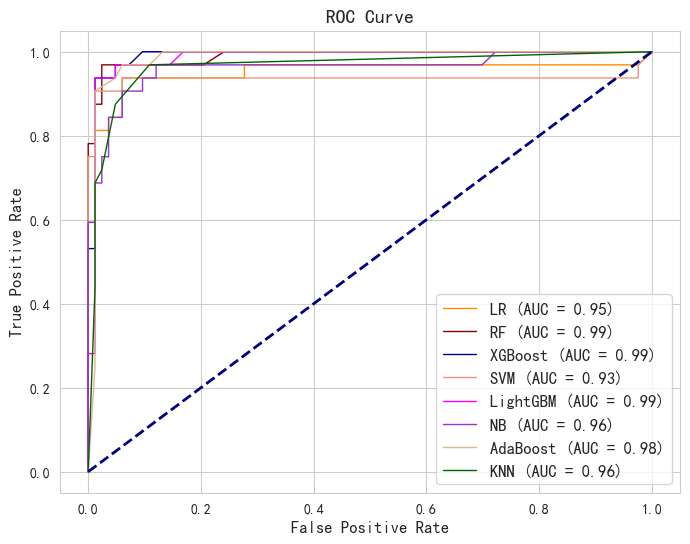

In [32]:
# 多个模型绘制
models_list = [LogisticRegression_model, rf_model, xgb_model, svm_model,lgb_model,nb_model, ada_model,knn_model]
labels_list = ['LR', 'RF', 'XGBoost','SVM', 'LightGBM', 'NB', 'AdaBoost','KNN']
colors_list = ['darkorange', 'darkred', 'darkblue', 'darksalmon', 'fuchsia', 'darkorchid', 'burlywood', 'darkgreen']
plot_roc_curves(models_list, X_test_scaled, y_test, labels=labels_list, colors=colors_list)

<!-- @format -->

## 3.10 shap 可视化分析


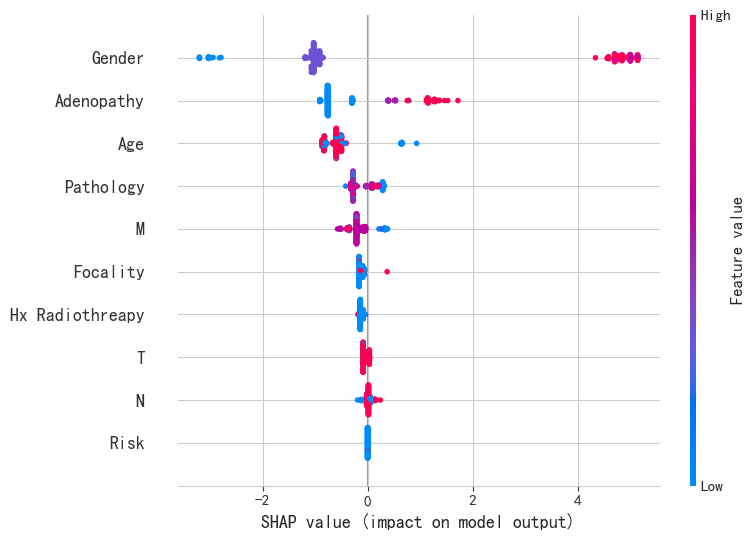

In [33]:
import shap
explainer = shap.TreeExplainer(xgb_model)# 计算shap值为numpy.array数组
shap_values_numpy = explainer.shap_values(encoded_train)
shap_values_numpy
plt.figure()
shap.summary_plot(shap_values_numpy, encoded_train, feature_names=X.columns, plot_type="dot", show=False)

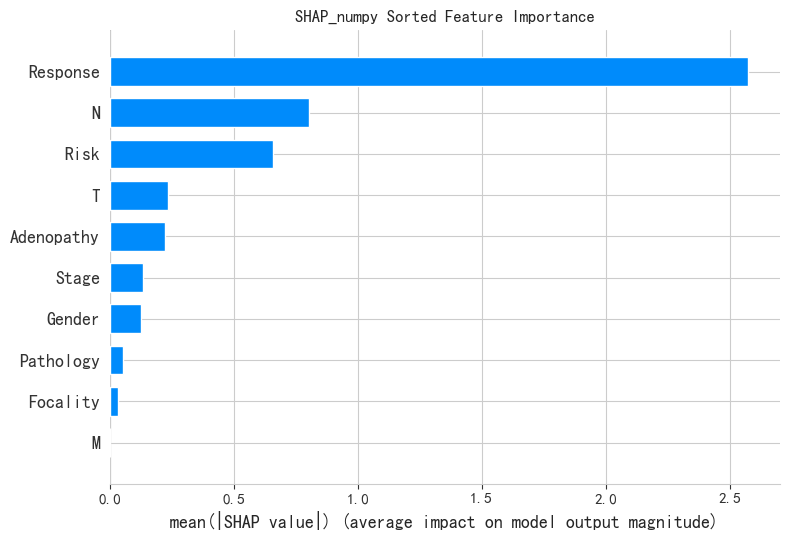

In [34]:
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values_numpy, encoded_train, feature_names=X.columns, plot_type="dot", show=False)
shap.summary_plot(shap_values_numpy, encoded_train, plot_type="bar", show=False)
plt.title('SHAP_numpy Sorted Feature Importance')
plt.tight_layout()
# plt.savefig("SHAP_numpy Sorted Feature Importance.pdf", format='pdf',bbox_inches='tight')
plt.show()

<!-- @format -->

## 3.11 保存模型文件


In [35]:
# 保存模型到文件
import joblib
# 把模型保存为一个名为LogisticRegression_model.joblib的文件,就在这个文件夹下
joblib.dump(LogisticRegression_model, './models/LogisticRegression_model.joblib')


['./models/LogisticRegression_model.joblib']

<!-- @format -->

# 4 模型调优


<!-- @format -->

## 4.1 引入参数调优的必要模块


In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import joblib


<!-- @format -->

## 4.2 网格搜索和随机搜索模型寻找最优参数


<!-- @format -->

| 特点/使用场景 | 网格搜索（Grid Search）                                                                      | 随机搜索（Random Search）                                                              |
| ------------- | -------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------- |
| **定义**      | 网格搜索是一种穷举搜索方法，它在预定义的参数网格中搜索最佳参数组合。                         | 随机搜索在参数空间中随机选择参数组合进行评估，以找到相对较好的参数组合。               |
| **实现方式**  | 定义一组超参数及其取值范围，形成一个网格。然后对网格中的每一种可能的参数组合进行训练和评估。 | 定义超参数的分布或范围，然后从这些分布中随机抽样参数组合进行训练和评估。               |
| **适用场景**  | 当参数空间较小且计算资源充足时，网格搜索能够保证找到全局最优参数组合。                       | 当参数空间较大、计算资源有限时，随机搜索可以在有限的计算成本内找到相对较好的参数组合。 |
| **优点**      | 能够保证找到全局最优参数组合，适合小规模数据集和低维参数空间。                               | 计算效率高，尤其在高维参数空间中表现出色，能够快速找到接近最优的参数组合。             |
| **缺点**      | 参数空间较大会导致计算量呈指数级增长，容易陷入“维度灾难”。                                   | 无法保证找到全局最优参数组合，只能找到近似最优解。                                     |
| **典型应用**  | 对模型性能要求极高且计算资源充足时，如在小规模数据集上的分类任务。                           | 在计算资源有限或参数空间较大时，如在大型数据集或复杂模型上的调优任务。                 |


In [37]:


param_search = 'GridSearchCV'

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 正则化强度的倒数
    'penalty': ['l1', 'l2'],              # 正则化类型
    'solver': ['liblinear', 'saga'],      # 求解器
    'class_weight': [None, 'balanced'],   # 类别权重
    'max_iter': [100, 200, 300]           # 最大迭代次数
}
if  param_search == 'GridSearchCV':
    # # 定义参数网格
    # 使用网格搜索进行调参
    search = GridSearchCV(
        estimator=LogisticRegression_model,
        param_grid=params,
        scoring='f1',  # 或者使用其他评估指标，如 'f1', 'roc_auc'
        cv=5,                # 5 折交叉验证
        n_jobs=-1,           # 使用所有 CPU 核心
        verbose=1
    )
    search.fit(X_train_scaled, y_train)
    # 查看最佳参数和最佳分数
    print("最佳参数：", search.best_params_)
    print("最佳分数：", search.best_score_)
elif param_search == 'RandomizedSearchCV':
    # 使用随机网格搜索进行调参
    search = RandomizedSearchCV(
        estimator=LogisticRegression_model,
        param_distributions=params,
        n_iter=50,              # 随机搜索的迭代次数，即尝试的参数组合数量
        scoring='f1',           # 或者使用其他评估指标，如 'f1', 'roc_auc'
        cv=5,                   # 5 折交叉验证
        n_jobs=-1,              # 使用所有 CPU 核心
        verbose=1,
        random_state=42         # 随机种子，保证结果可重复
    )
    search.fit(X_train_scaled, y_train)
    # 查看最佳参数和最佳分数
    print("最佳参数：", search.best_params_)  
    print("最佳分数：", search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
最佳参数： {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
最佳分数： 0.8056536796536797


<!-- @format -->

## 4.3 使用最佳参数重新训练模型


In [38]:
# 直接保存调用最优模型
best_model = search.best_estimator_

# 评估参数最优模型性能
best_y_pred = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, best_y_pred)
best_recall = recall_score(y_test, best_y_pred,average='weighted')
best_precision = precision_score(y_test, best_y_pred,average='weighted')
print("最佳LogisticRegression模型准确率:", best_accuracy)
print("最佳LogisticRegression模型召回准确率:", best_recall)
print("最佳LogisticRegression模型精确准确率:", best_precision)
print("分类报告：\n", classification_report(y_test, best_y_pred))
print("混淆矩阵：\n", confusion_matrix(y_test, best_y_pred))

# 保存模型
joblib.dump(best_model, './models/best_logistic_regression_model.joblib')

最佳LogisticRegression模型准确率: 0.9217391304347826
最佳LogisticRegression模型召回准确率: 0.9217391304347826
最佳LogisticRegression模型精确准确率: 0.9208604999825668
分类报告：
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        83
           1       0.90      0.81      0.85        32

    accuracy                           0.92       115
   macro avg       0.91      0.89      0.90       115
weighted avg       0.92      0.92      0.92       115

混淆矩阵：
 [[80  3]
 [ 6 26]]


['./models/best_logistic_regression_model.joblib']

<!-- @format -->

# 5 最佳模型推理模块


<!-- @format -->

## 5.1 引入模型推理必要的库


In [39]:
import pandas as pd
import numpy as np
from joblib import dump, load
from sklearn.preprocessing import LabelEncoder
import pickle

<!-- @format -->

## 5.2 对推理数据进行编码


In [40]:

# 加载映射字典
with open('./models/mapping_dicts.pkl', 'rb') as f:
    loaded_mapping_dicts = pickle.load(f)

inference_data = pd.read_csv('inference_data.csv')
# 对推理数据进行编码
encoded_inference = inference_data.copy()
for feature in categorical_features:
    mapping = loaded_mapping_dicts[feature]
    # 处理未知类别
    encoded_inference[feature] = encoded_inference[feature].apply(lambda x: x if x in mapping else 'Unknown')
    # 应用映射字典
    encoded_inference[feature] = encoded_inference[feature].map(mapping)

# print("\n推理数据编码结果:")
# print(encoded_inference)

In [41]:
encoded_inference

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,3,2,1,2,0,0,0,0,2,No
1,34,0,0,3,2,1,2,0,0,0,0,1,No
2,30,0,0,3,2,1,2,0,0,0,0,1,No
3,62,0,0,3,2,1,2,0,0,0,0,1,No
4,62,0,0,3,2,0,2,0,0,0,0,1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,5,3,1,0,6,2,1,4,0,Yes
379,81,1,1,1,3,0,0,6,2,1,4,3,Yes
380,72,1,0,0,3,0,0,6,2,1,4,3,Yes
381,61,1,1,1,1,0,0,6,2,0,3,3,Yes


<!-- @format -->

## 5.3 加载模型进行推理


In [42]:
# 加载数据标准化模块
loaded_scaler = joblib.load('./models/scaler.joblib')
# 对推理数据进行标准化处理
scaled_encoded_inference = loaded_scaler.transform(encoded_inference[selected_features])
# 查看标准化后的推理数据
encoded_inference.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,3,2,1,2,0,0,0,0,2,No
1,34,0,0,3,2,1,2,0,0,0,0,1,No
2,30,0,0,3,2,1,2,0,0,0,0,1,No
3,62,0,0,3,2,1,2,0,0,0,0,1,No
4,62,0,0,3,2,0,2,0,0,0,0,1,No


<!-- @format -->

## 5.4 加载模型调优的最佳模型进行模型推理


In [43]:
# 加载最佳模型进行预测
loaded_model = joblib.load('./models/best_logistic_regression_model.joblib')
y_pred = pd.DataFrame(loaded_model.predict(scaled_encoded_inference), columns=['Predicted'])

# 将预测标签映射为类别名称
pre_result = pd.DataFrame(y_pred['Predicted'].replace({v:k for k,v in label_dict.items()})).rename(columns={'Predicted':'pre_result'})


In [44]:
result = pd.concat([inference_data.reset_index(drop=True),y_pred.reset_index(drop=True),pre_result.reset_index(drop=True)], axis=1)
result

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Predicted,pre_result
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,0,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,0,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,0,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,0,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes,1,Yes
379,81,M,Yes,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,1,Yes
380,72,M,No,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,1,Yes
381,61,M,Yes,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,1,Yes


<!-- @format -->

## 5.5 对推理结果进行保存


In [45]:
# 保存模型推理结果
result.to_csv('result.csv', index=False)
print('模型推理完毕!!')

模型推理完毕!!


<!-- @format -->

## 5.6 模型推理结果可视化


每个主成分的方差贡献率: [0.73439522 0.08868745]


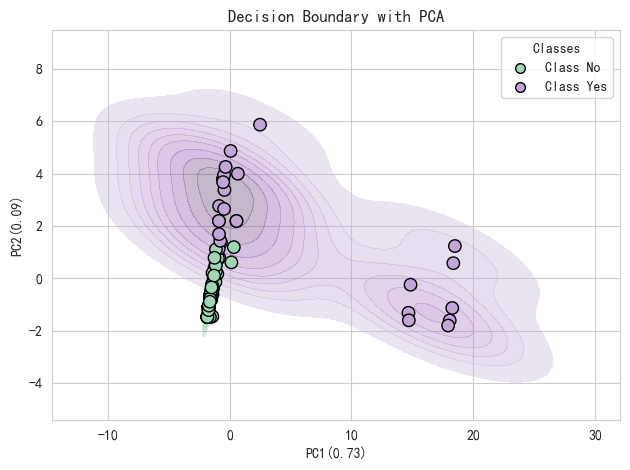

In [46]:
# 将数据通过PCA算法进行降维，将数据从高维空间映射到低维空间，以便于可视化。
# 导入PCA库
from sklearn.decomposition import PCA

# 使用 PCA 将数据降维到2D
pca = PCA(n_components=2,random_state=42)
X_test_pca = pca.fit_transform(X_test_scaled)
variance_ratio = pca.explained_variance_ratio_
print("每个主成分的方差贡献率:", variance_ratio)
# 定义自定义颜色，对于多分类可以设定多个颜色，当前代码适合二分类和三分类模型
custom_colors = ['#A0D6B4', '#C3A6D8', '#F7CBA3']  # 按类别顺序定义颜色


# 绘制密度图
for i, label in enumerate(np.unique(best_y_pred)):
    subset = X_test_pca[best_y_pred == label]
    sns.kdeplot(x=subset[:, 0], y=subset[:, 1], 
                color=custom_colors[i], shade=True, alpha=0.4, label=f'Density (Class {dict[i]})')



# 绘制散点图
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], 
                      c=[custom_colors[i] for i in best_y_pred], 
                      edgecolor='black', s=80)

# 添加轴标签和标题
plt.xlabel(f'PC1({variance_ratio[0]:.2f})')
plt.ylabel(f'PC2({variance_ratio[1]:.2f})')
plt.title('Decision Boundary with PCA')

# 添加图例
# 为了在图例中展示类别名称，需要将数字标签映射到对应标签，生成对应dict
label_target_dict = {v:k for k,v in label_dict.items()}
unique_labels = np.unique(best_y_pred)
for i, label in enumerate(unique_labels):
    plt.scatter([], [], color=custom_colors[i], edgecolor='black', s=100, label=f'Class {label_target_dict[i]}')

plt.legend(title="Classes", loc="upper right", markerscale=0.7)

# 调整布局以适应图例
plt.tight_layout(rect=[0, 0, 1, 1])

plt.show()

<!-- @format -->

### 如果需要进行项目的迁移，使用 pip freeze > requirements.txt 生成项目依赖包，

### 使用 pip install -r requirements.txt 安装依赖包
